<a href="https://colab.research.google.com/github/bryanco03/Proyecto1_parte2/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graficacion de electrocardiogramas y la obtencion de la frecuencia cardiaca**

En el siguiente notebook, se va a graficas electrocardiogramas, a partir de señales de sonido del corazon, los cu







In [ ]:
# Importar librerias
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt # Para filtrado de data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

In [ ]:
def ecg(variable):
    record = wave.open(variable, 'r') # carga la informacion

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")

    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False

    for i in range(0, len(waveData)):

        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])

        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False

    return mxs_indices

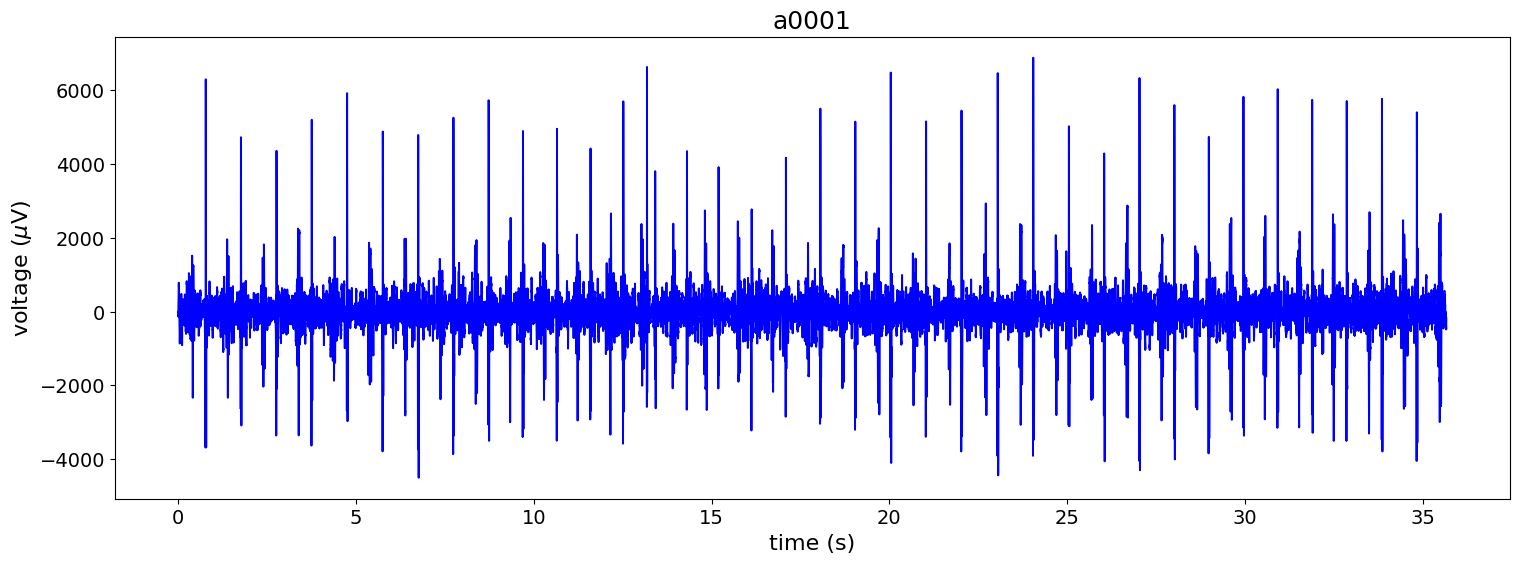

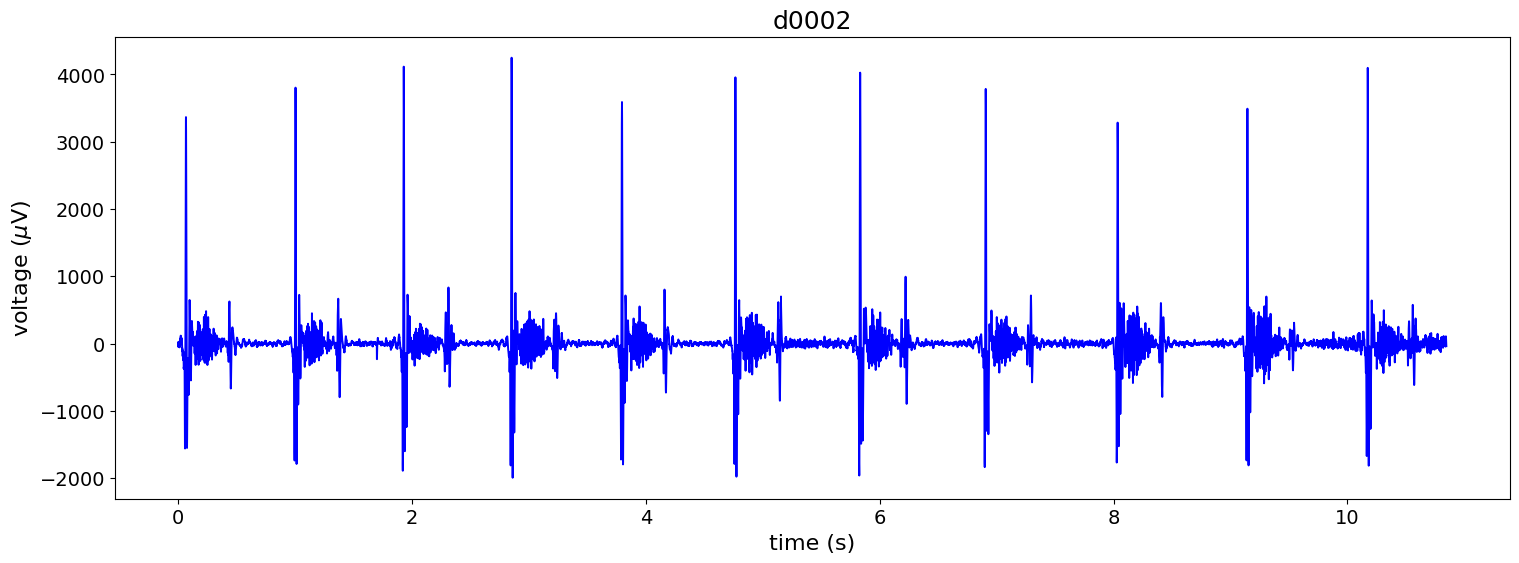

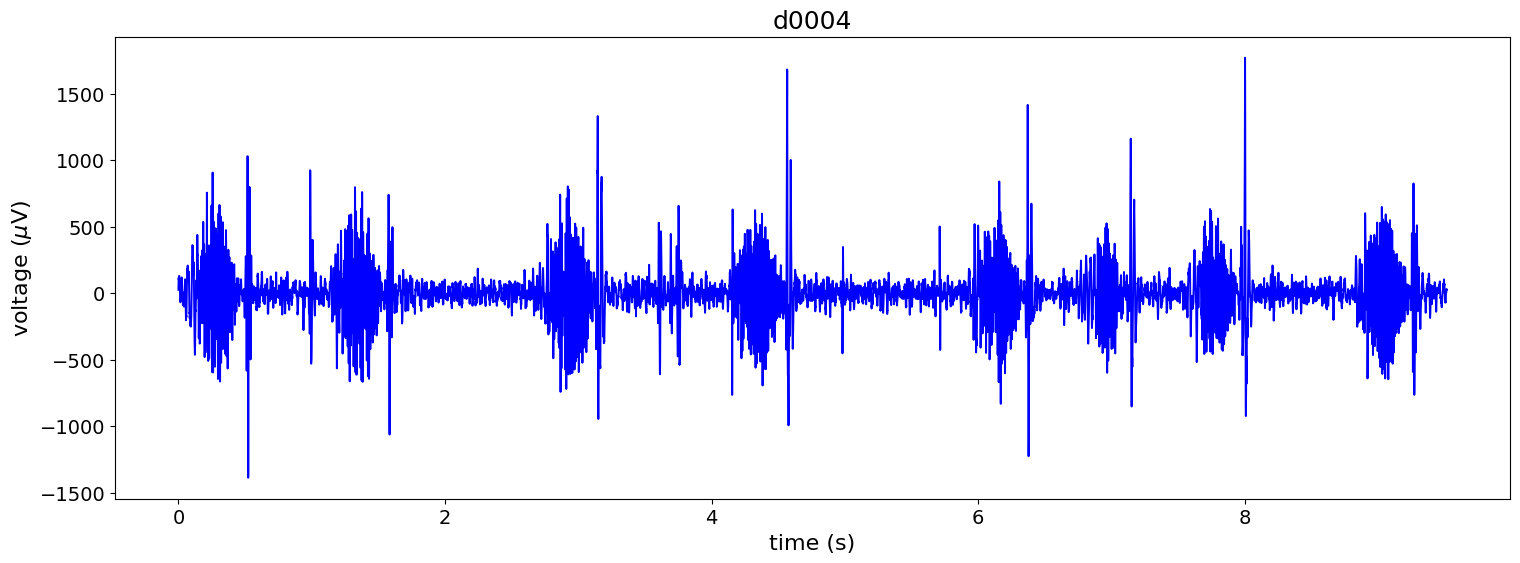

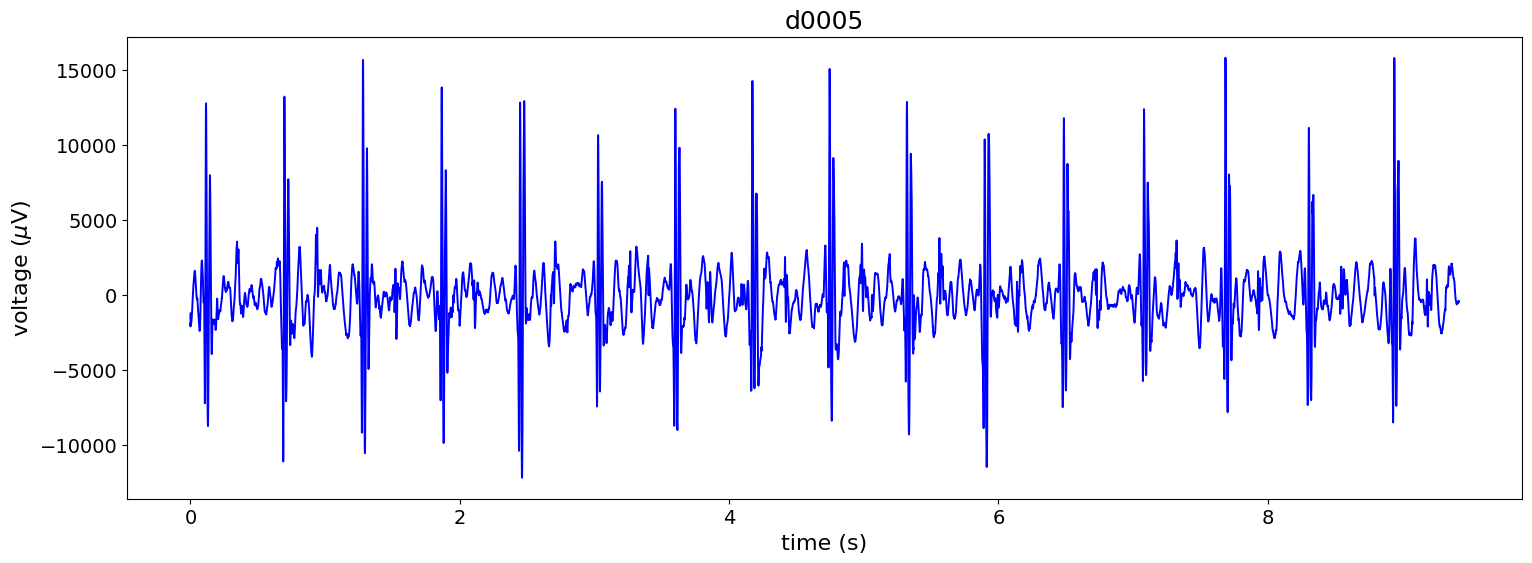

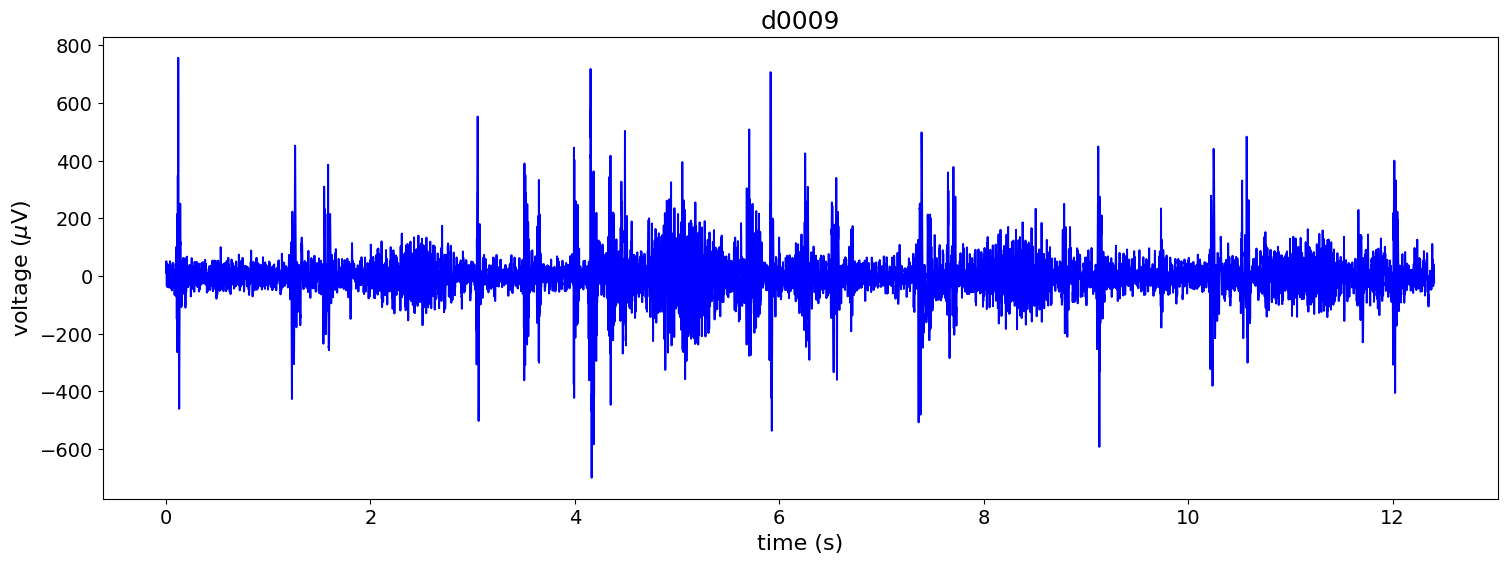

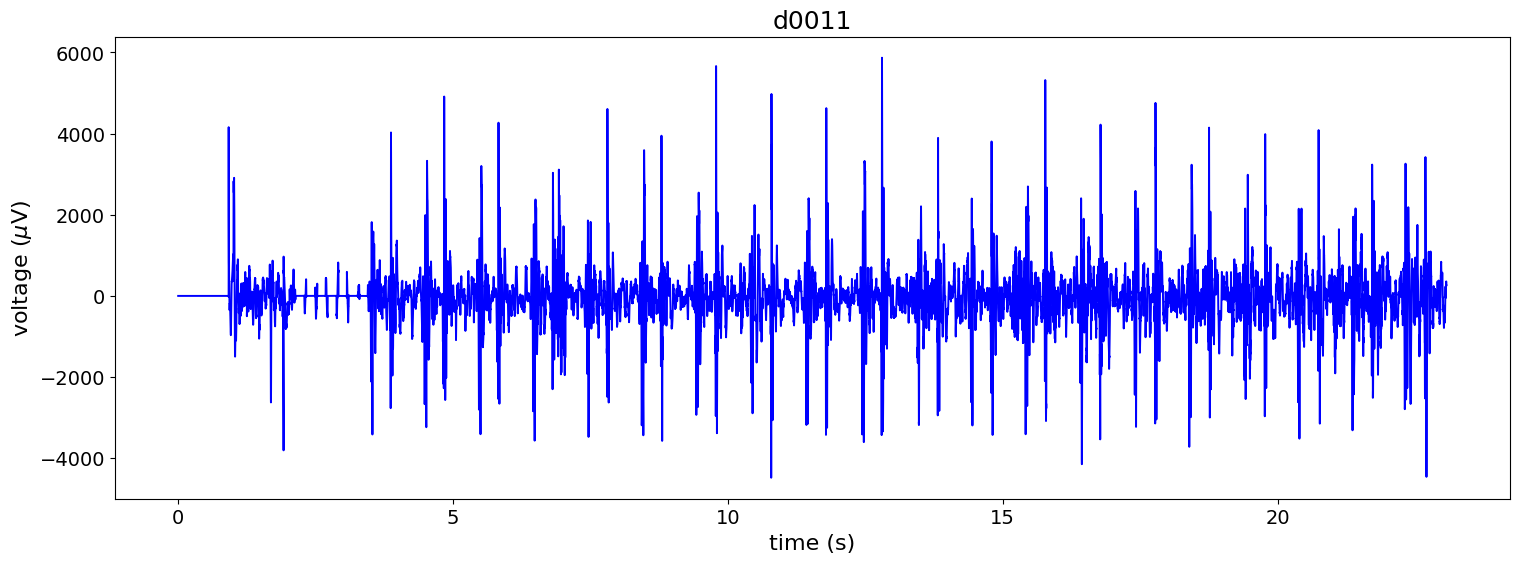

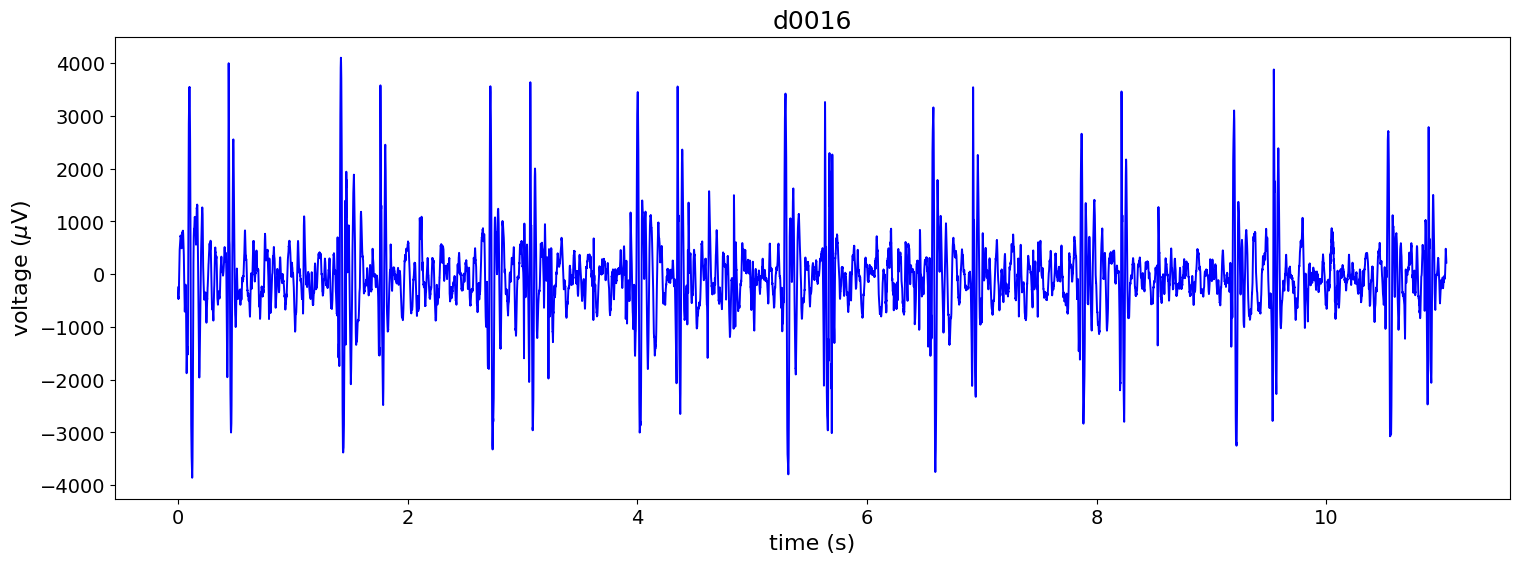

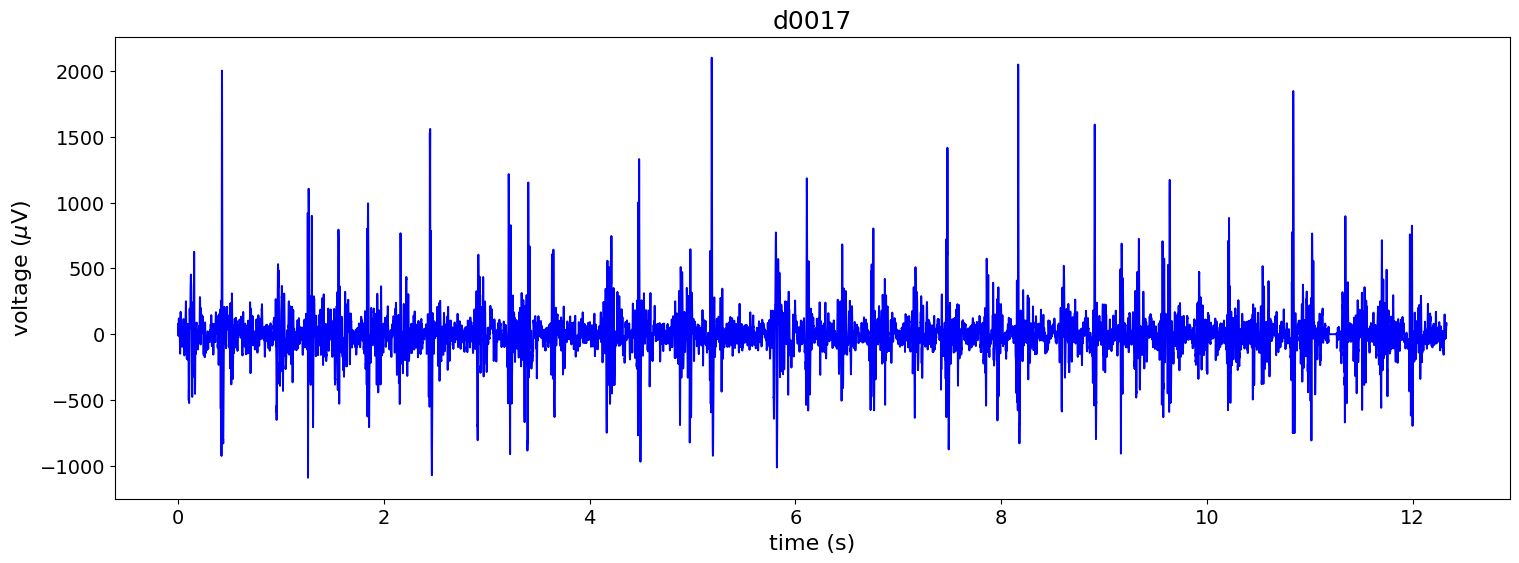

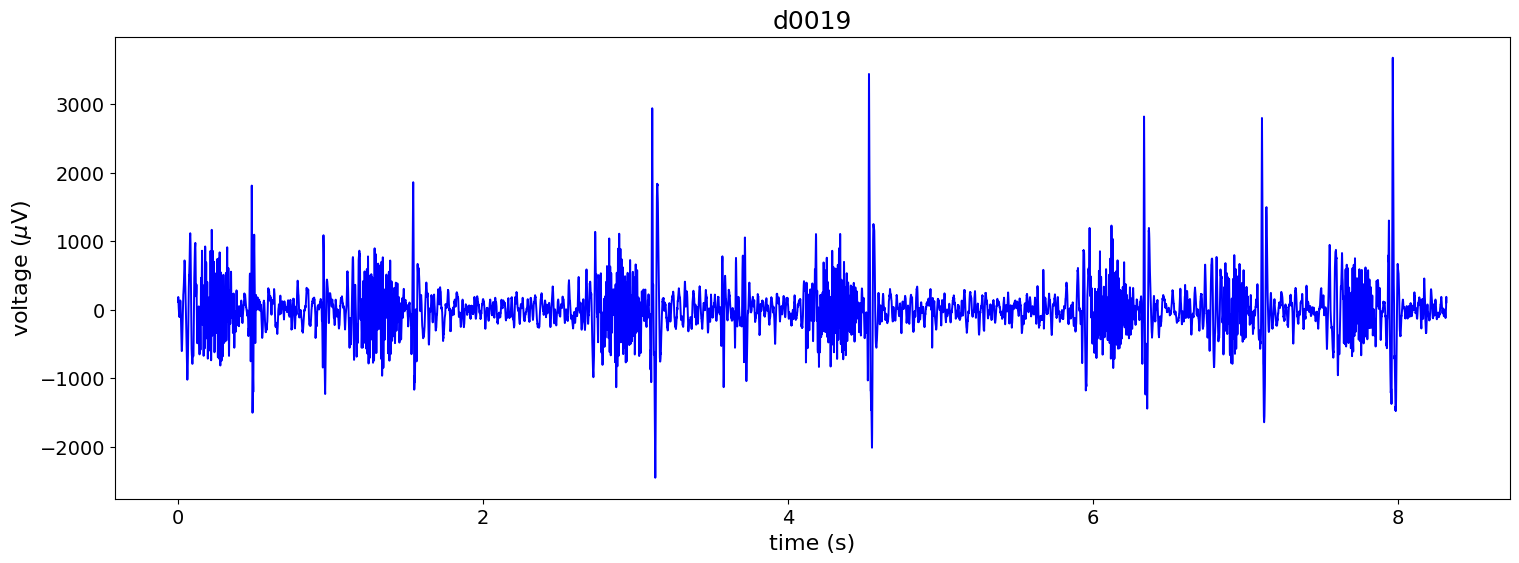

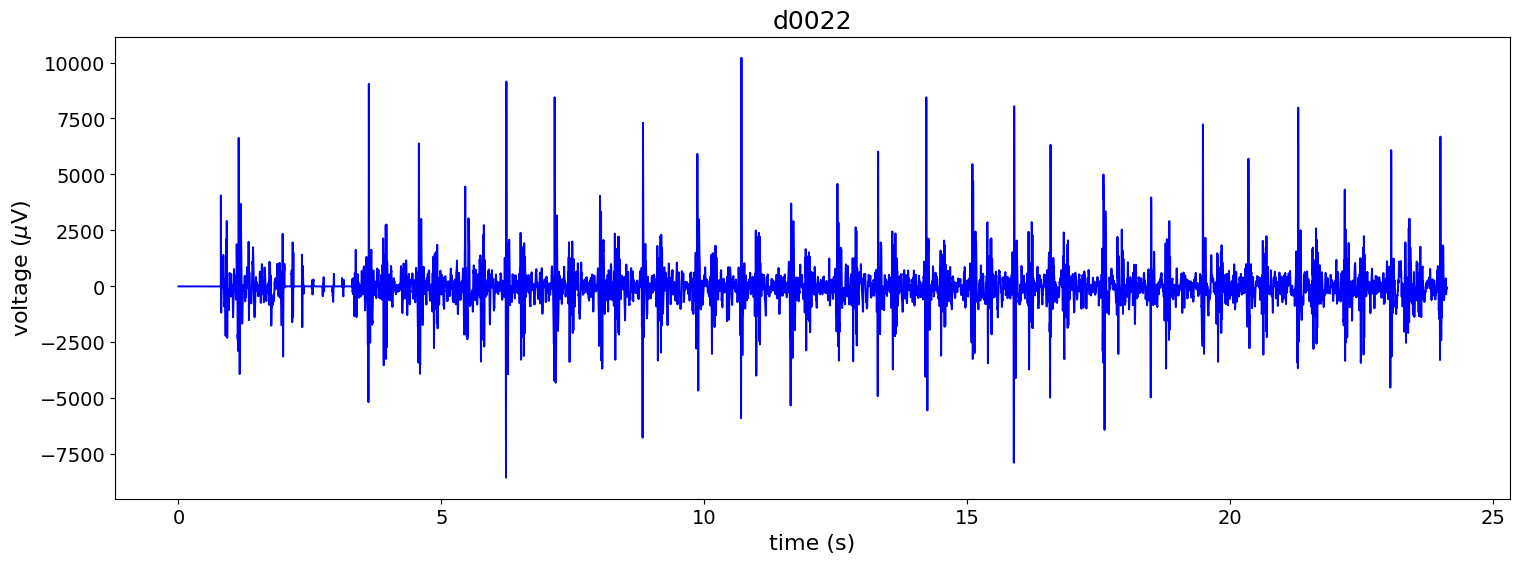

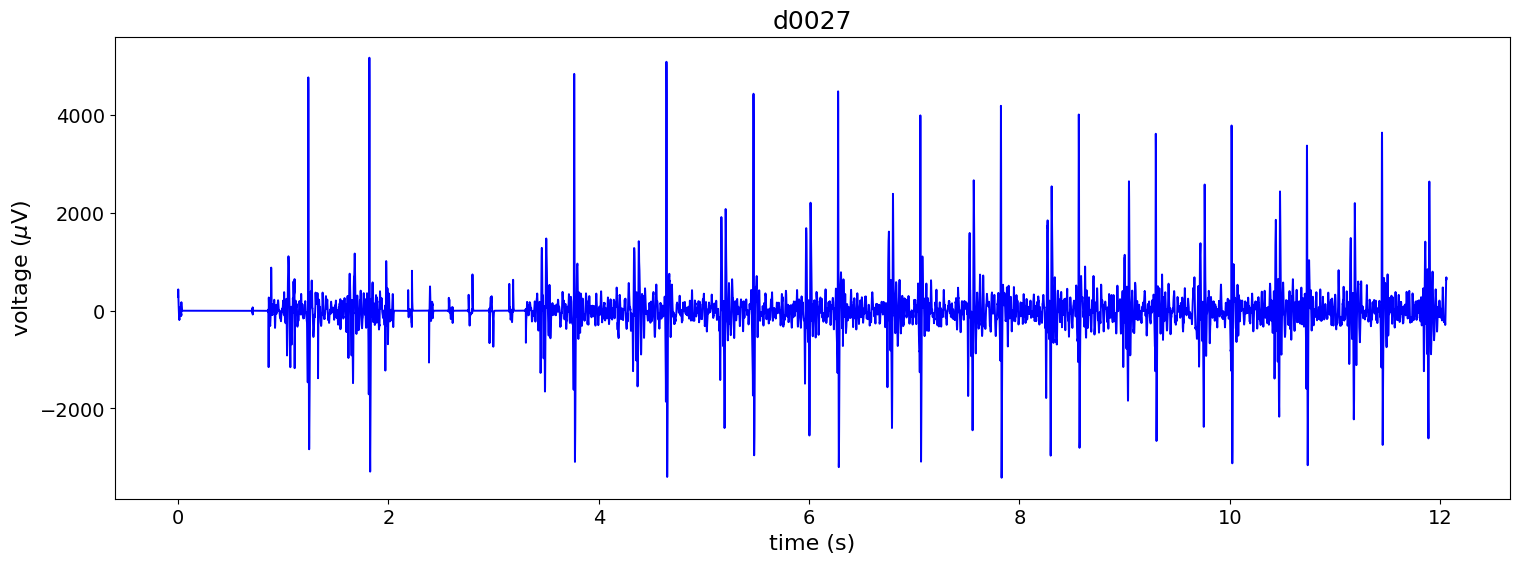

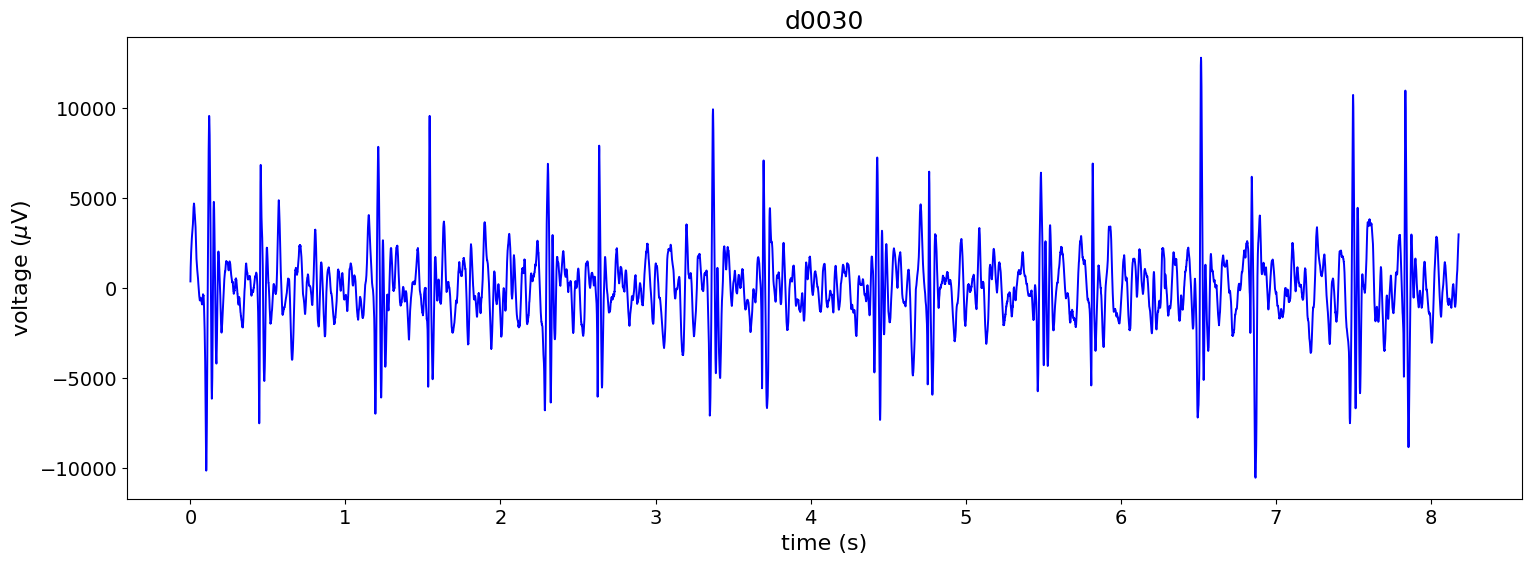

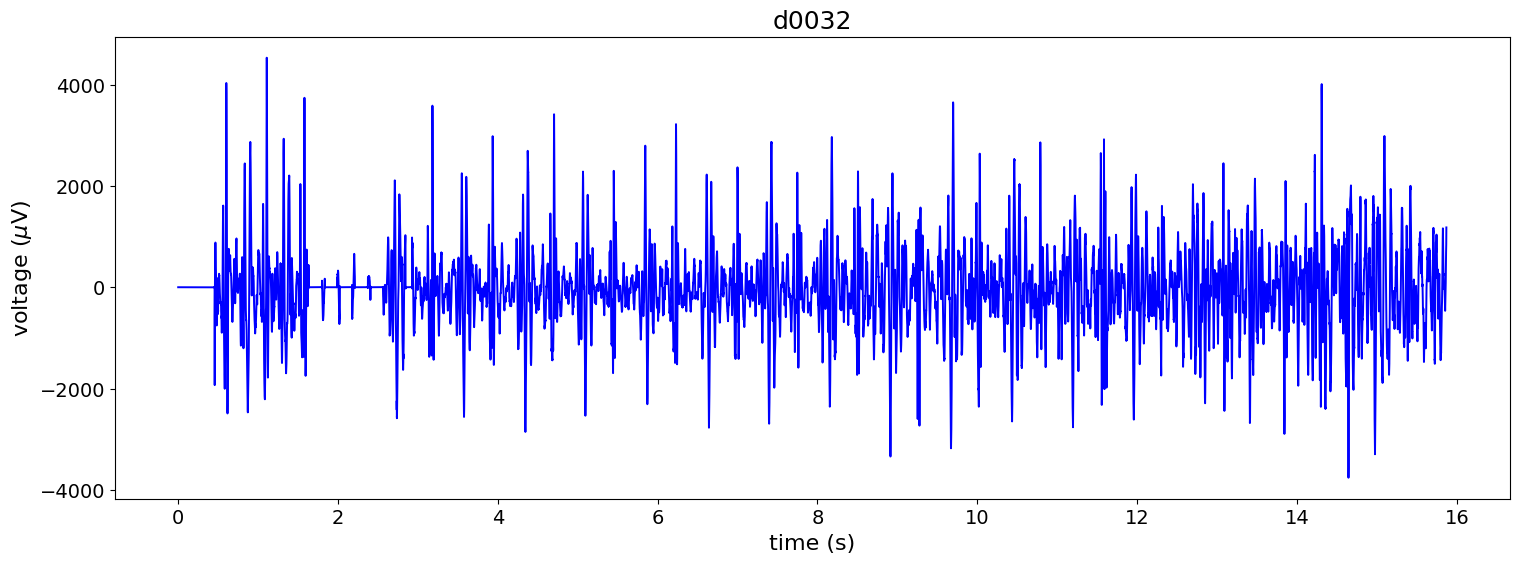

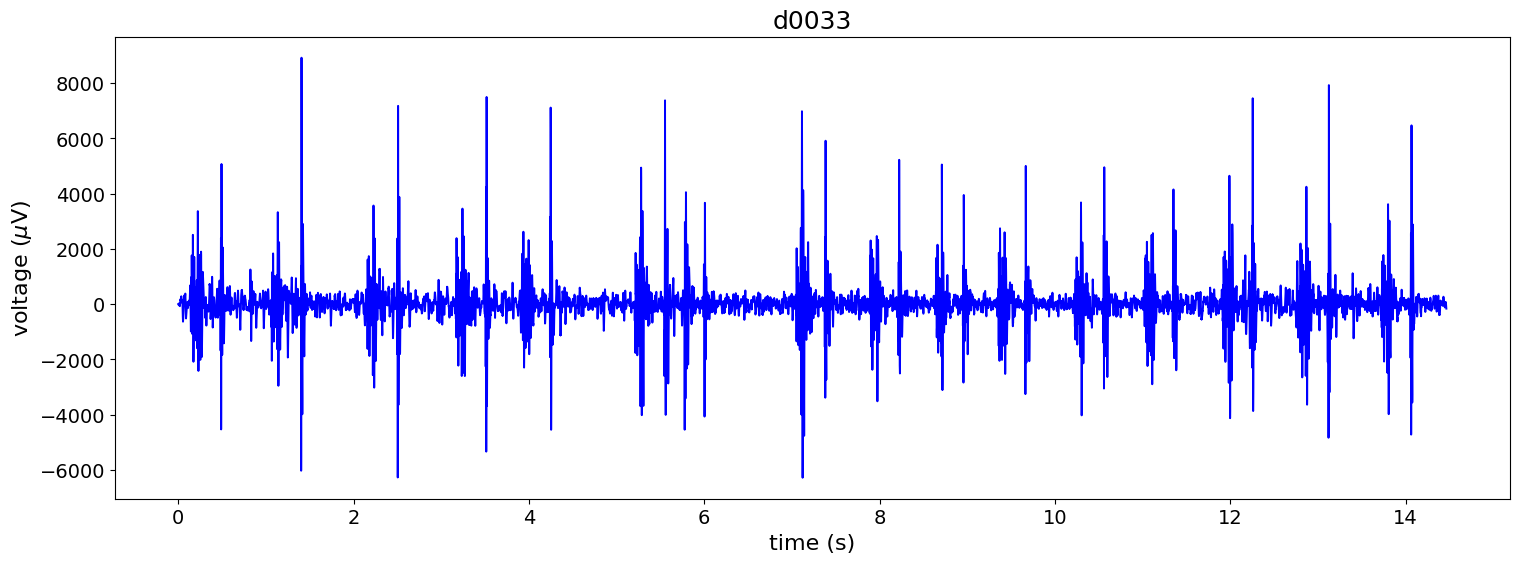

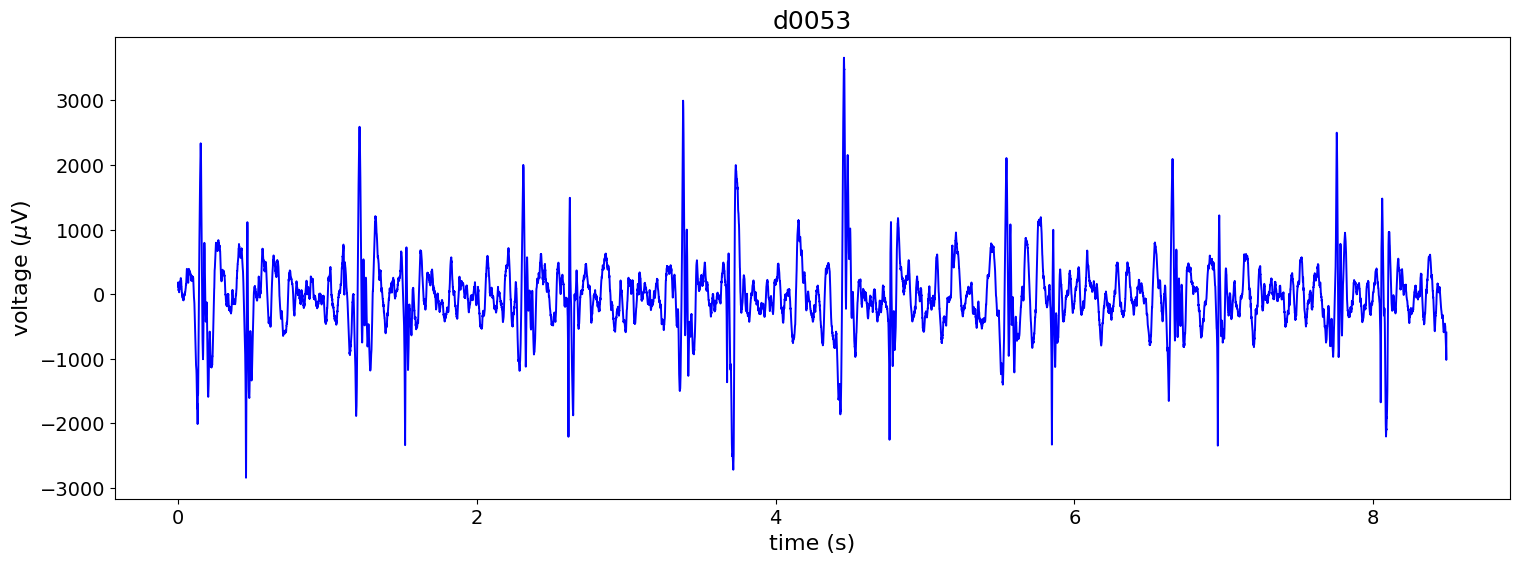

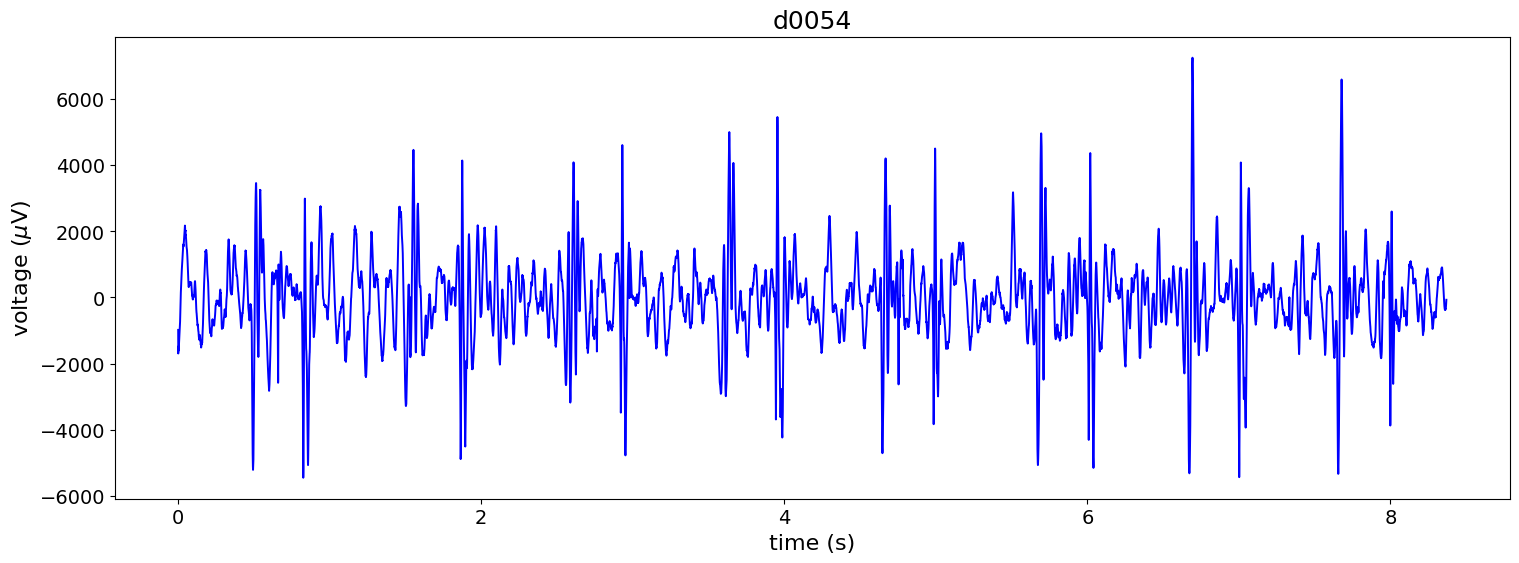

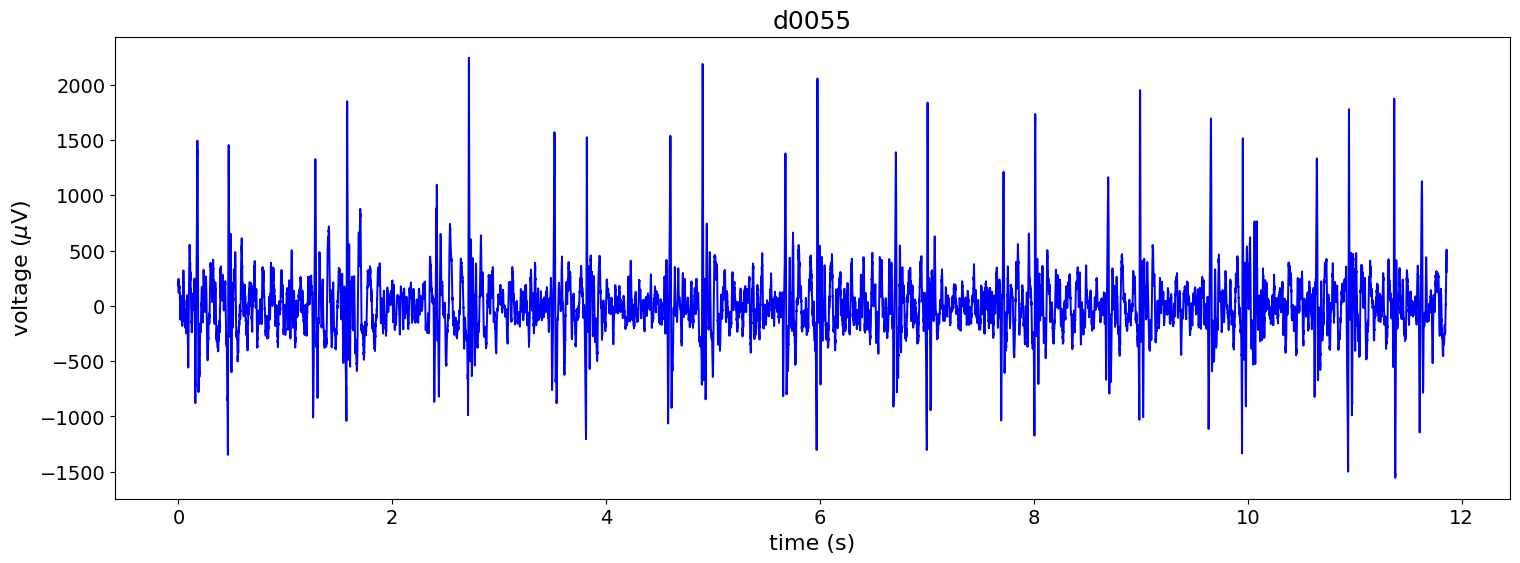

In [4]:
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

nice = ["a0001","d0002","d0004","d0005","d0009","d0011","d0016","d0017","d0019","d0022","d0027","d0030","d0032","d0033","d0053","d0054","d0055"]

for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
       #Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()

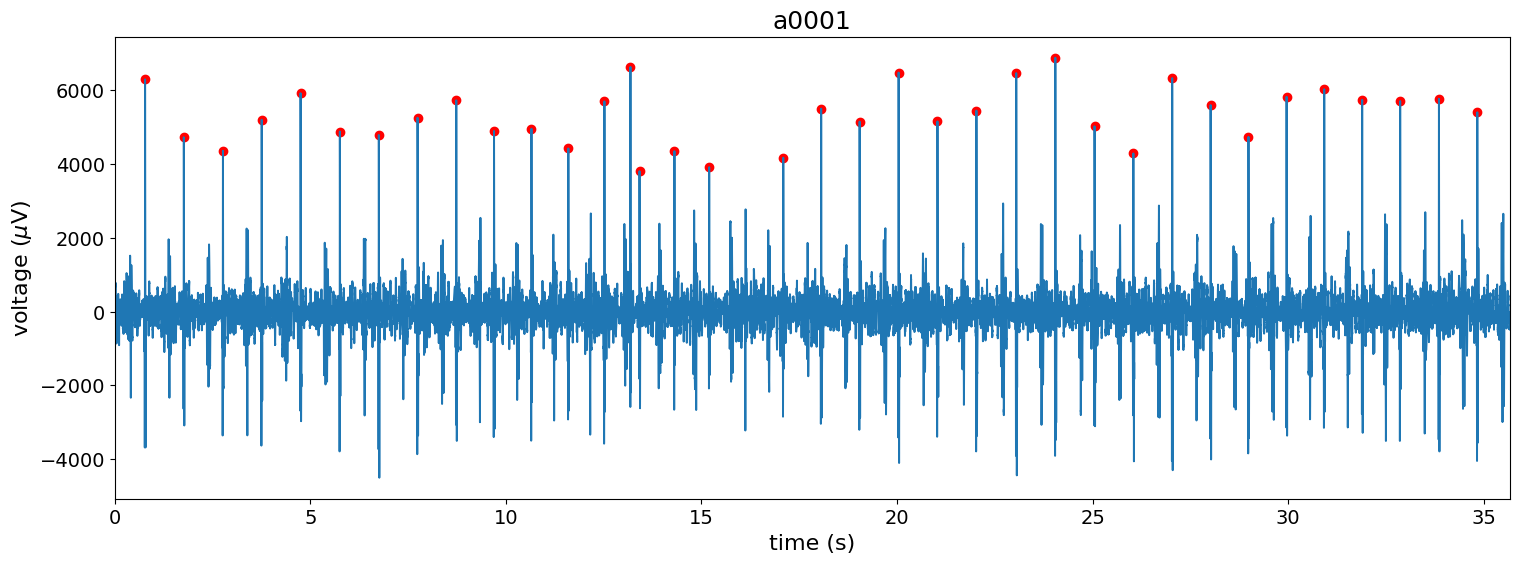

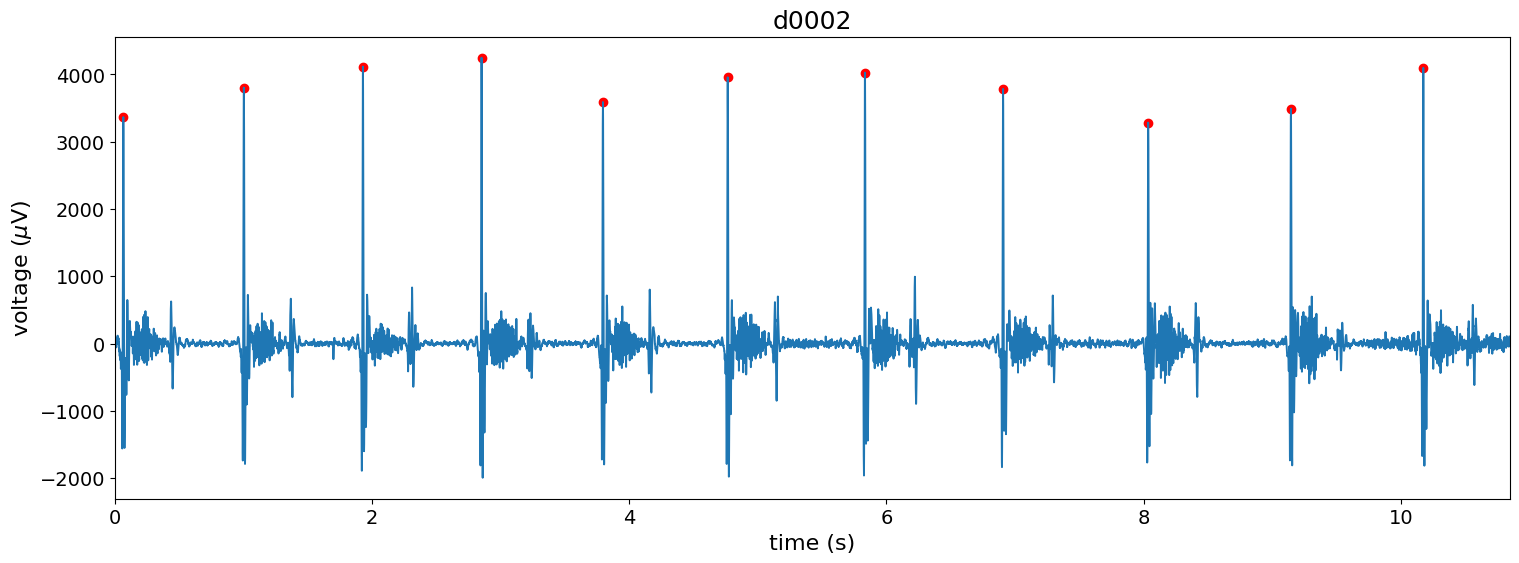

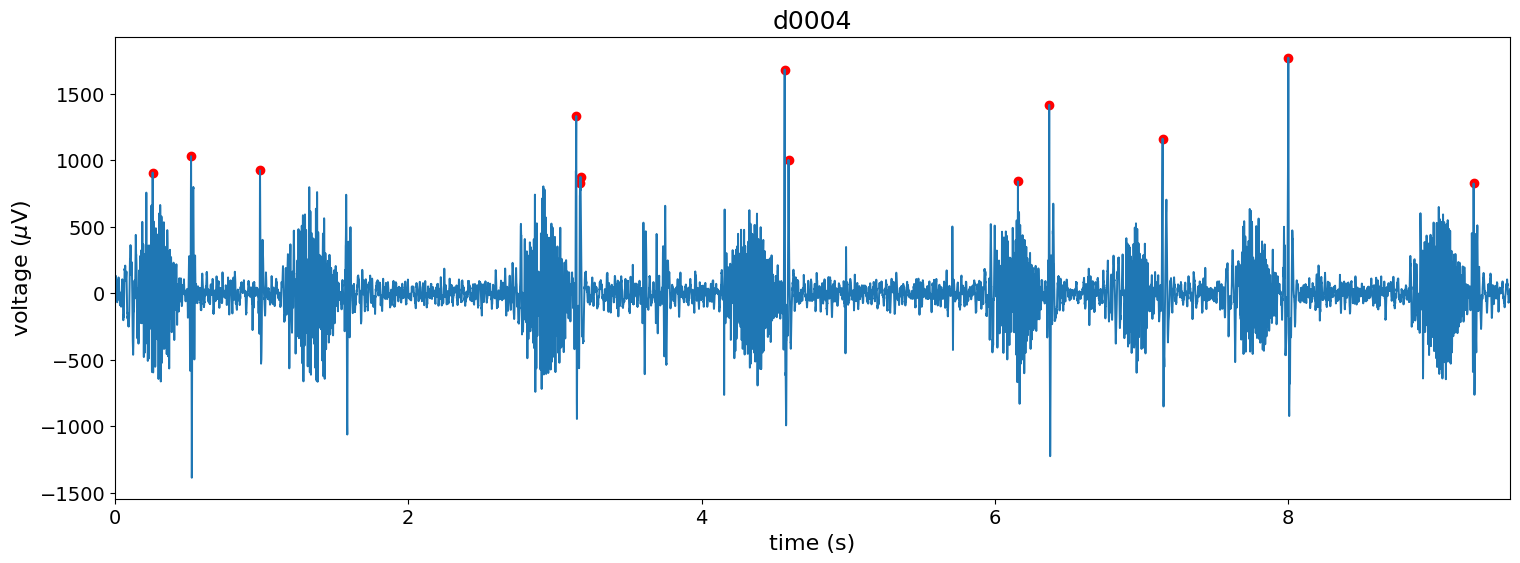

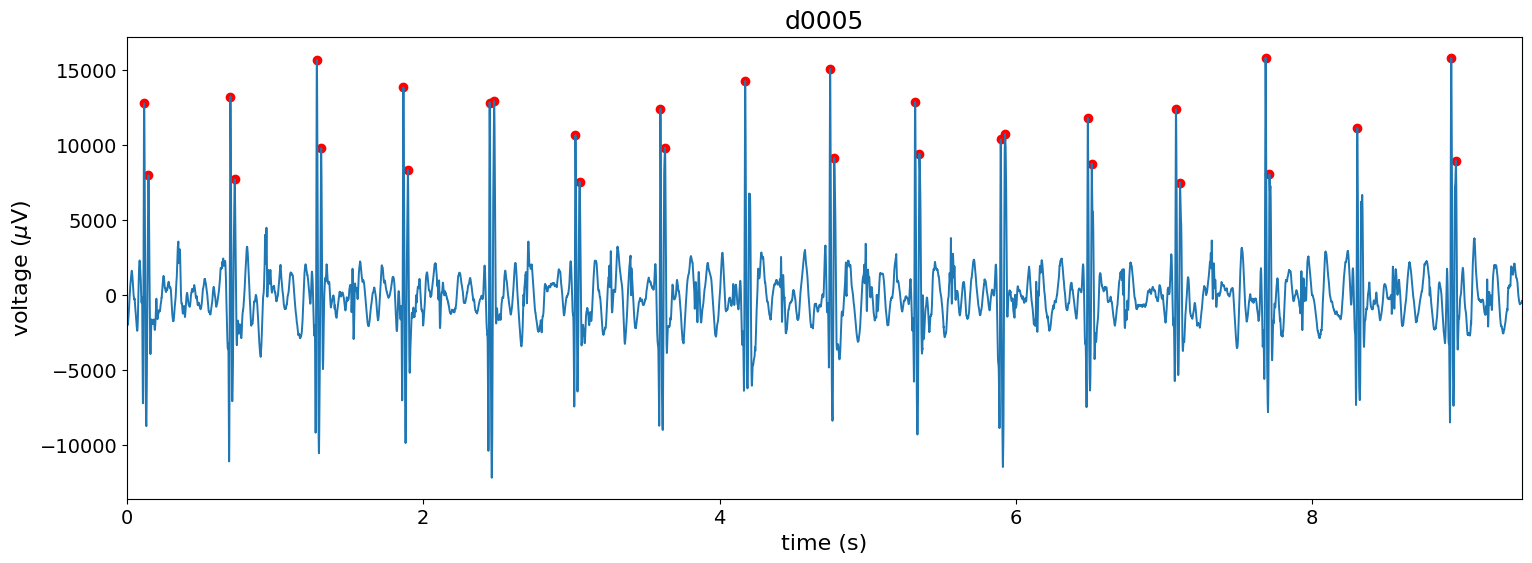

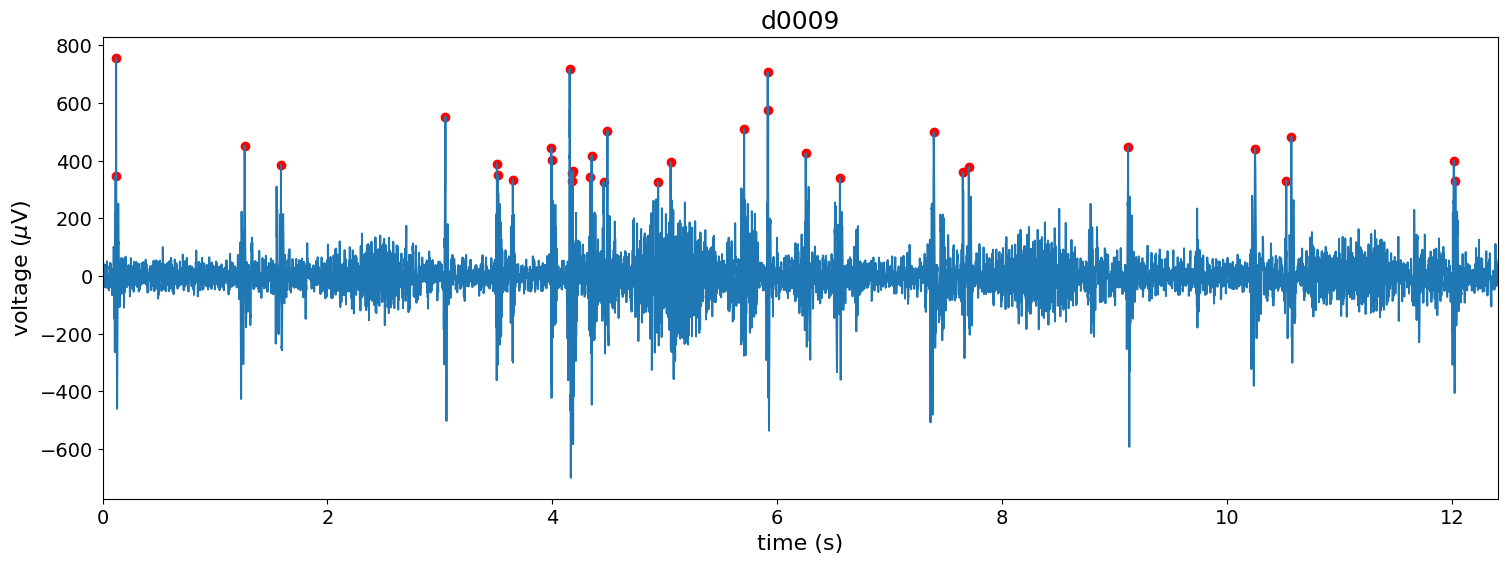

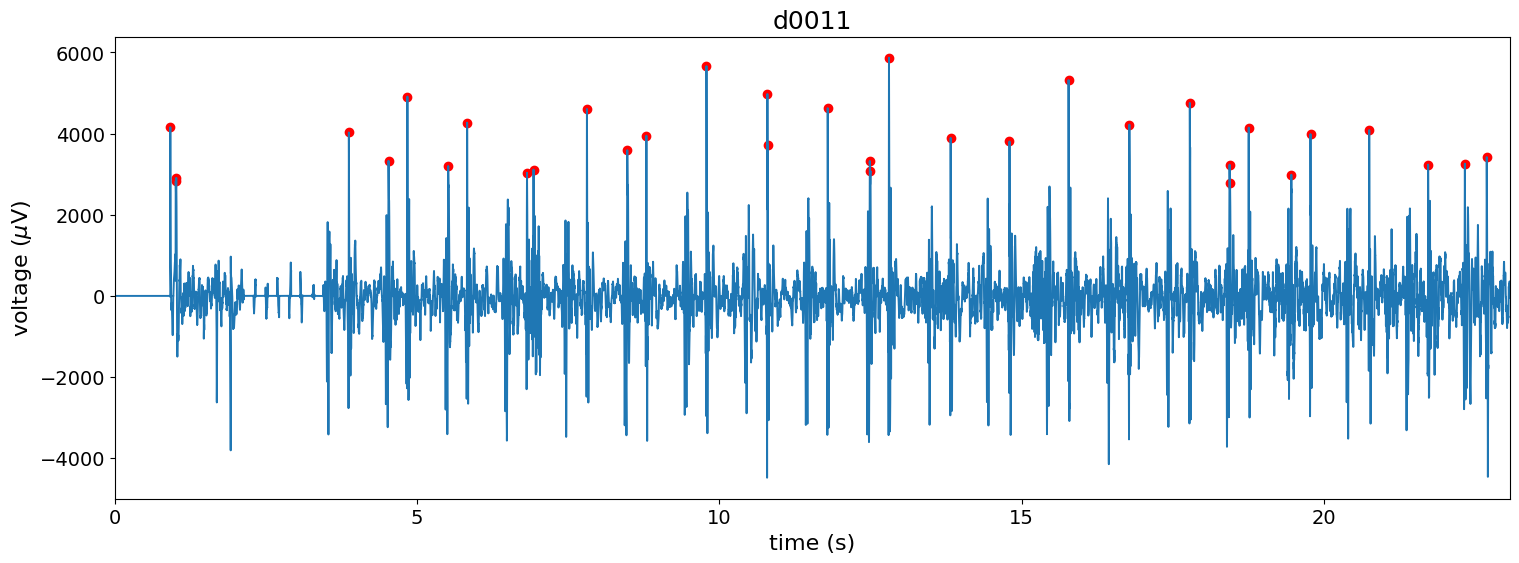

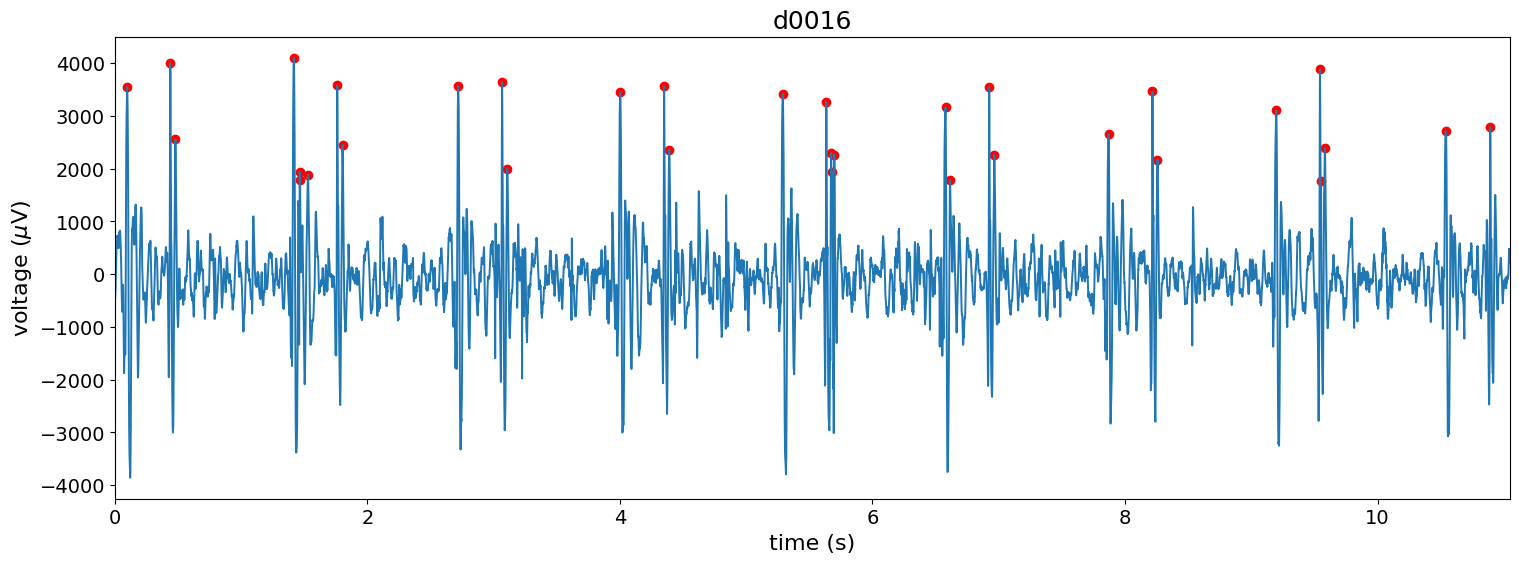

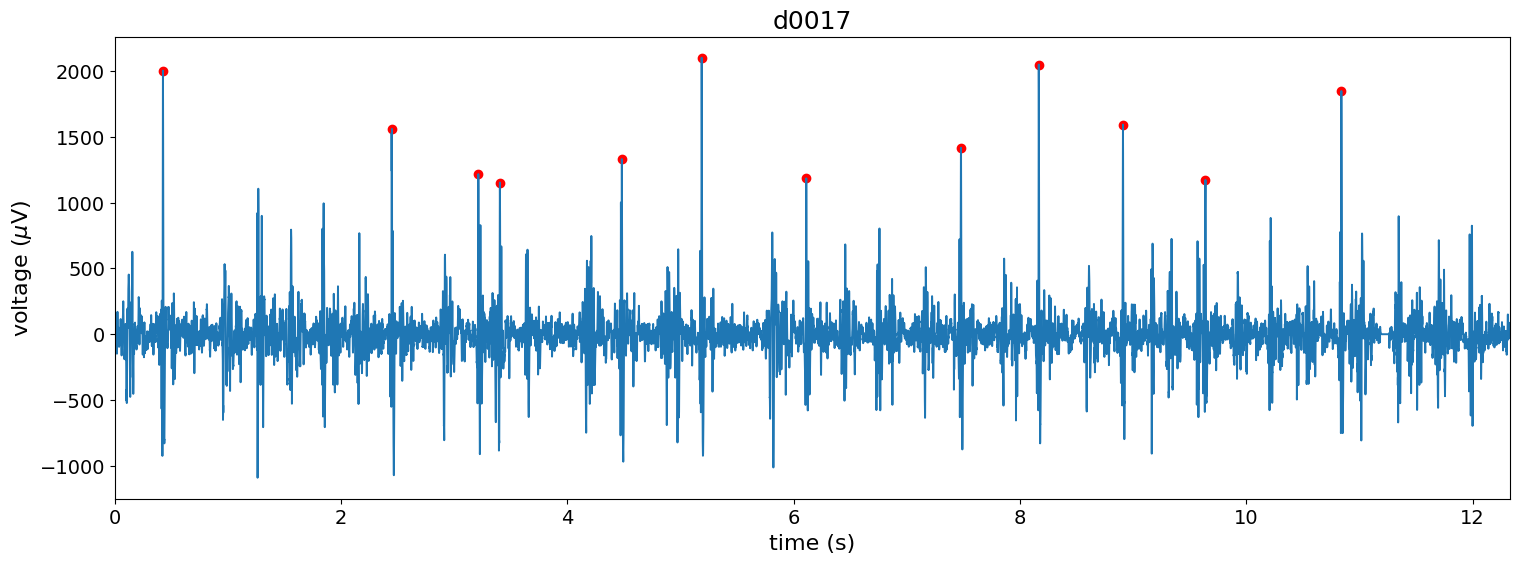

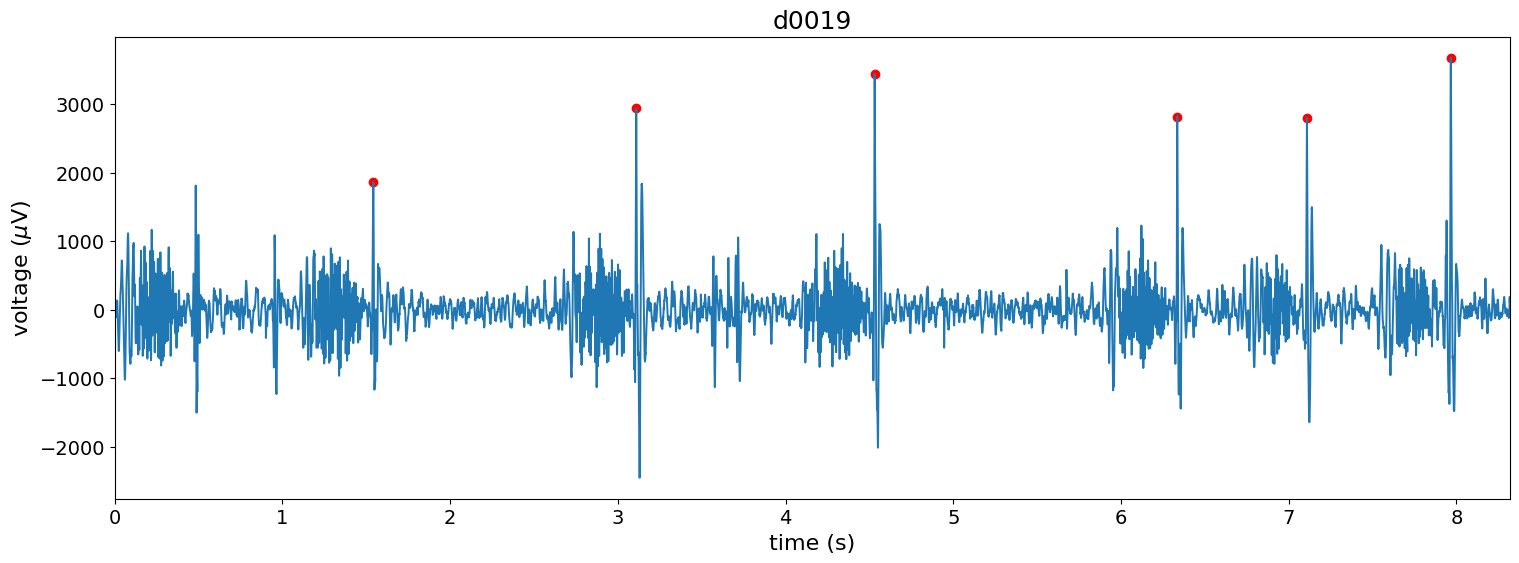

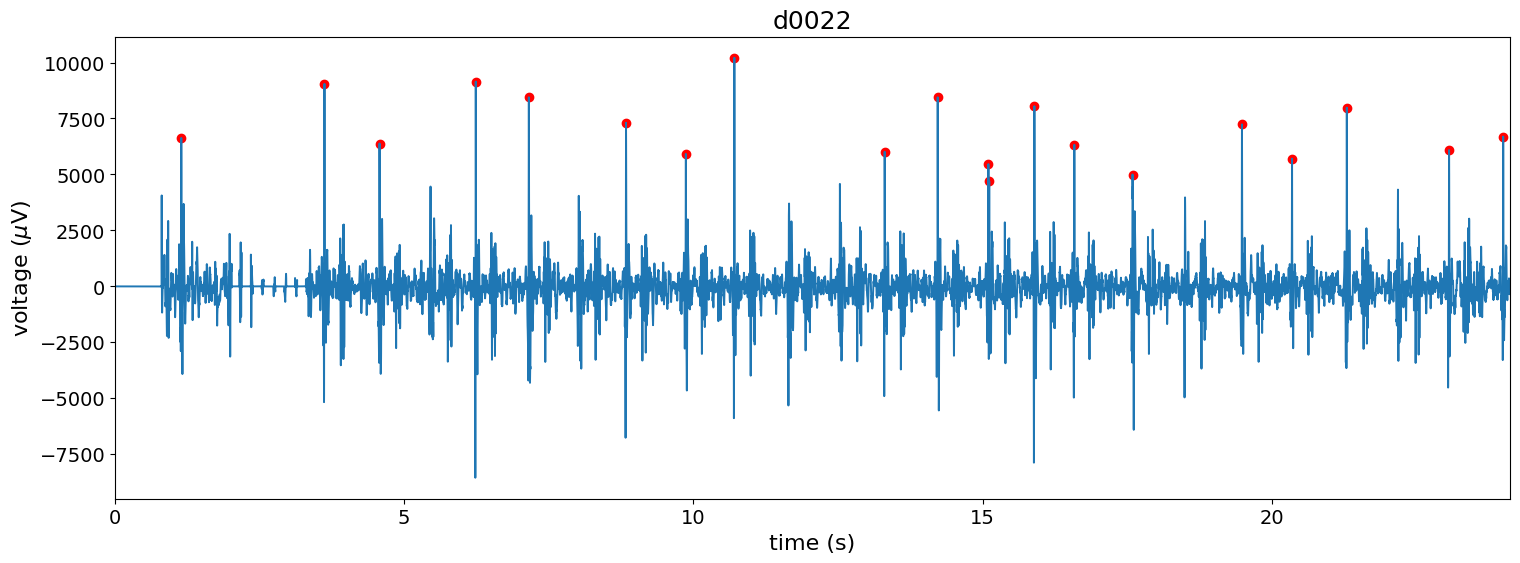

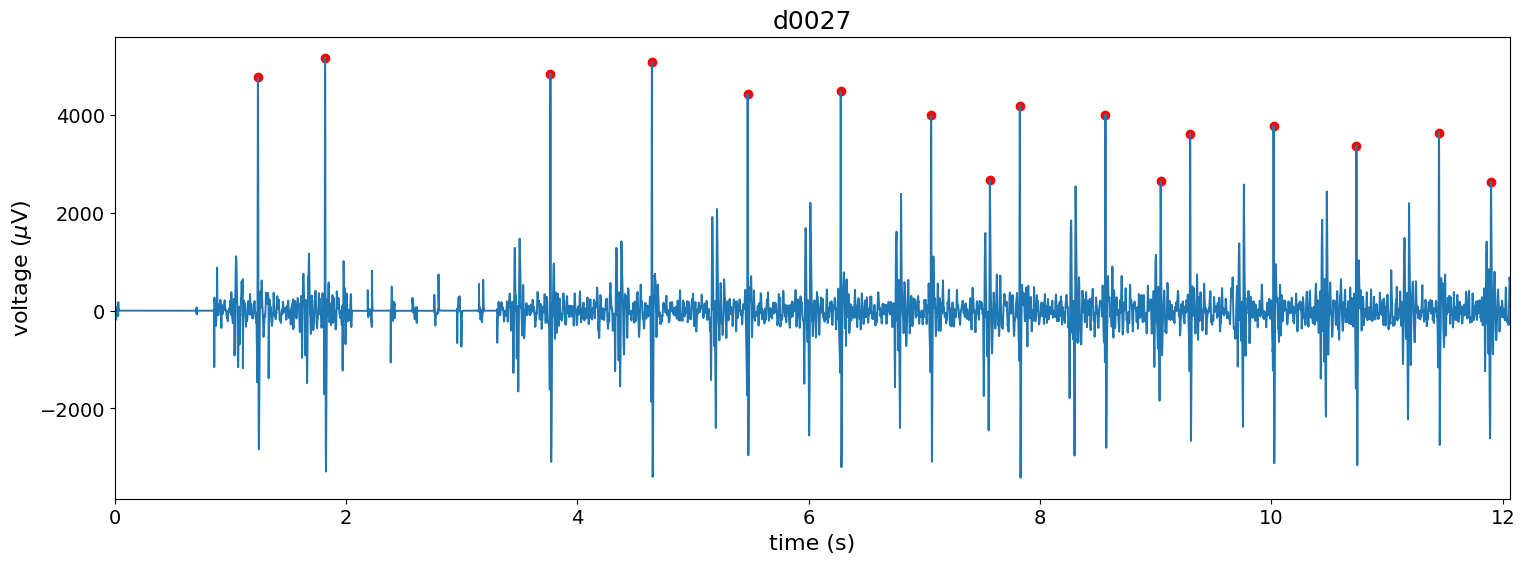

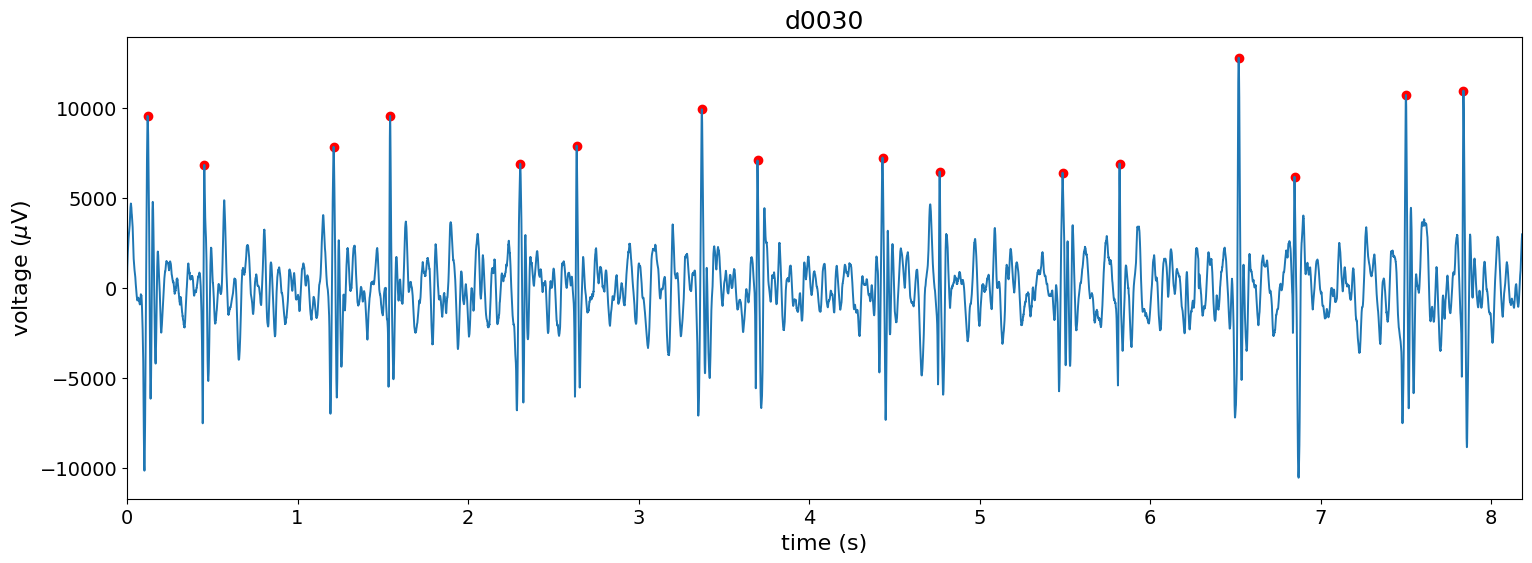

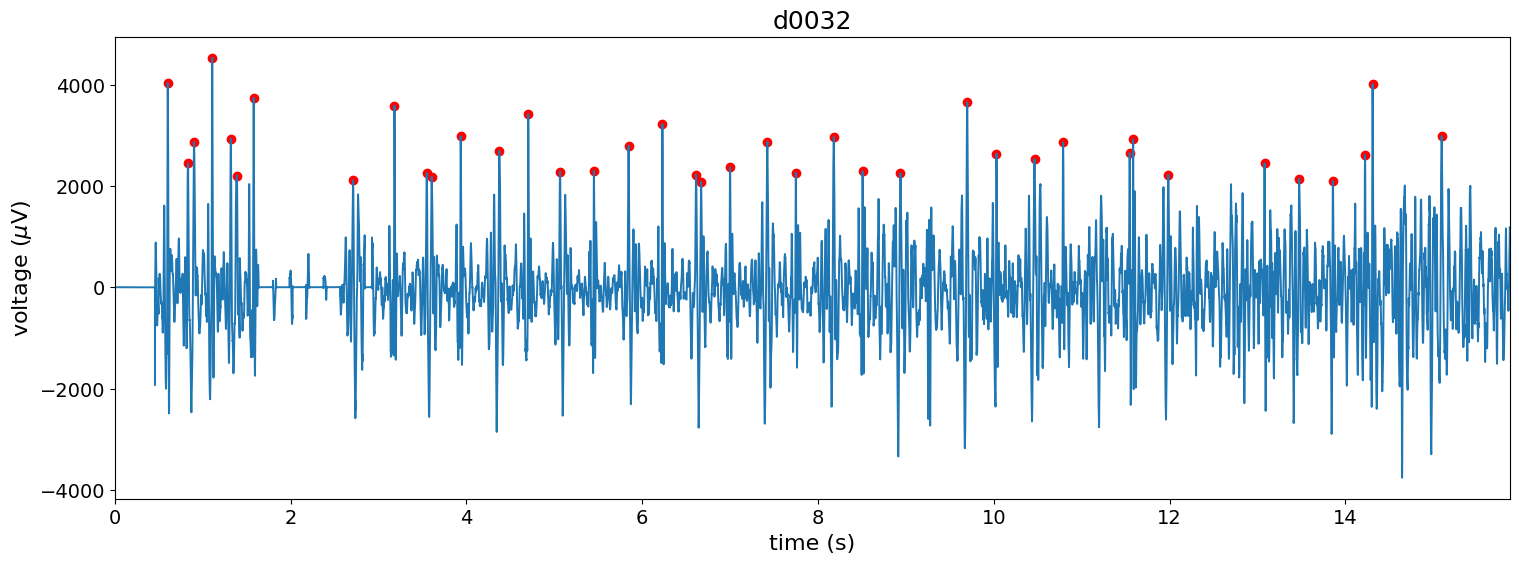

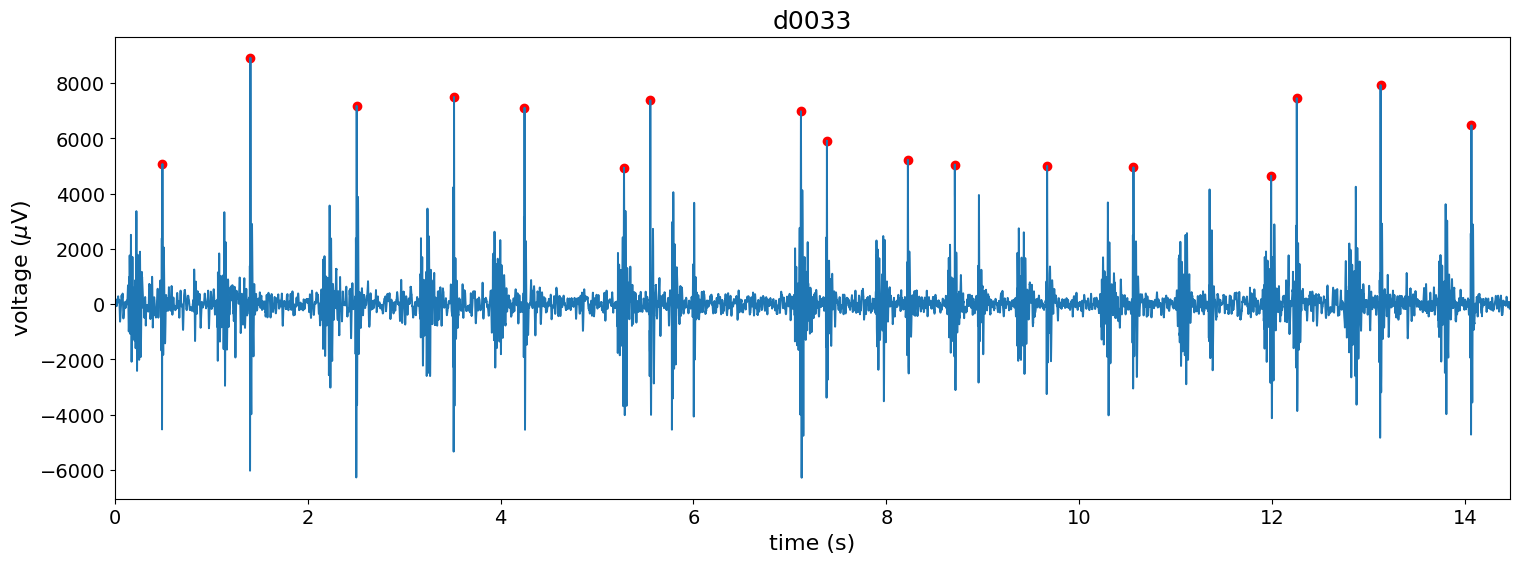

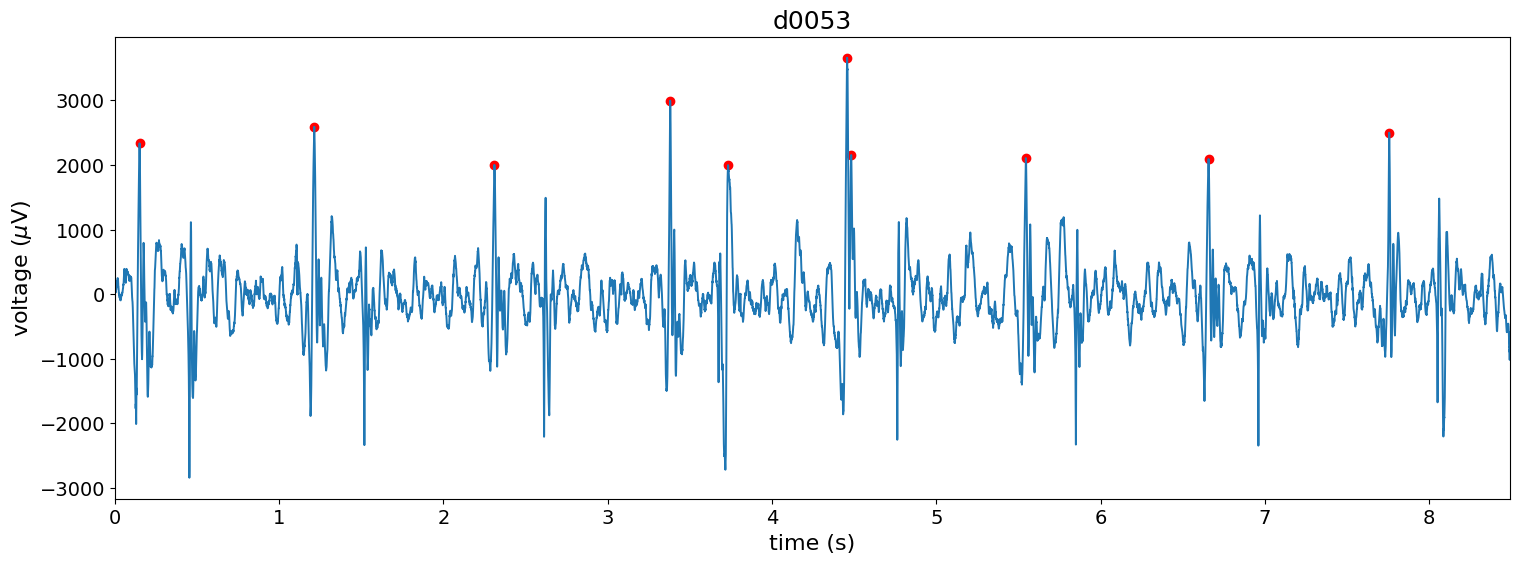

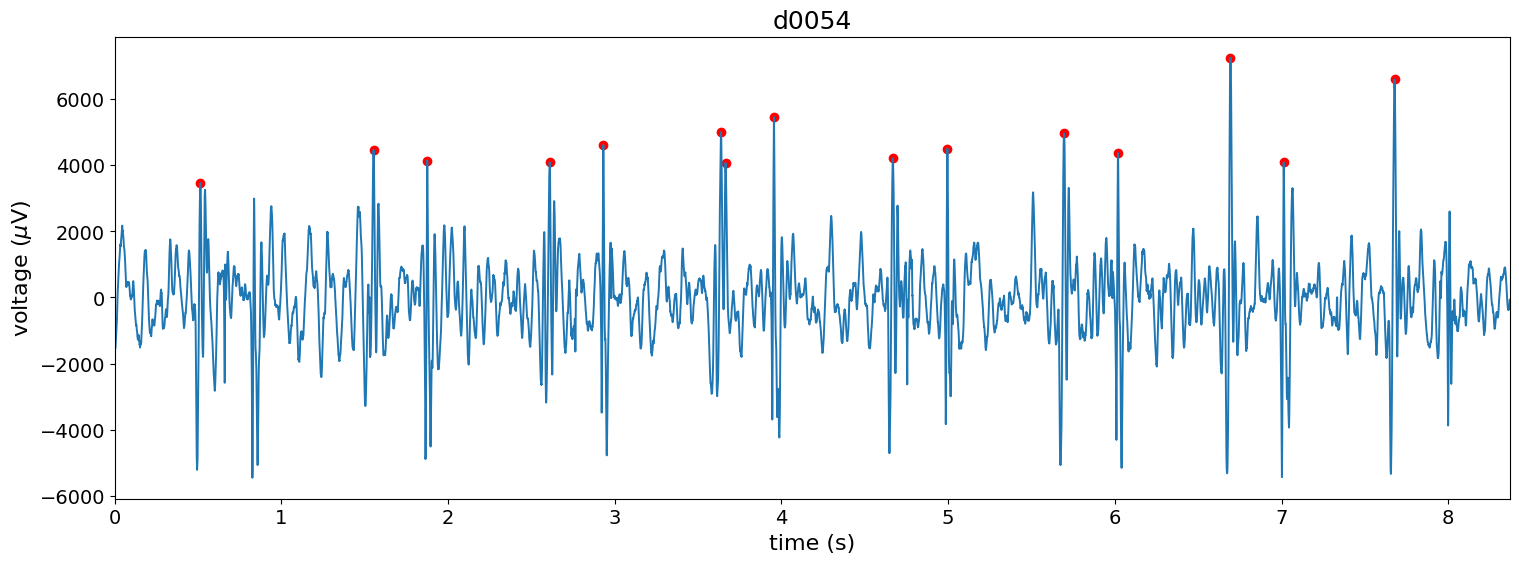

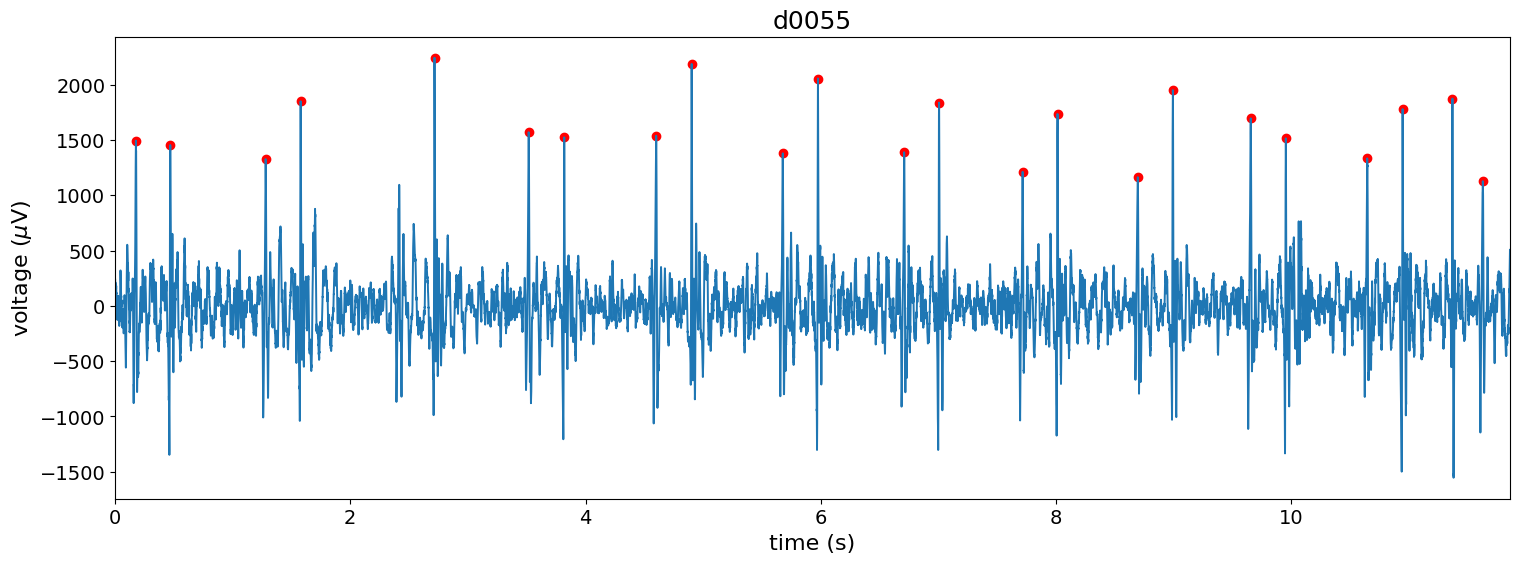

In [ ]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    mxs_indices = detecta_maximos_locales(timeECG, waveData)
       #Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.xlim(min(timeECG),max(timeECG))
    plt.plot(timeECG, waveData)
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    plt.title(nice[i])
    plt.show()

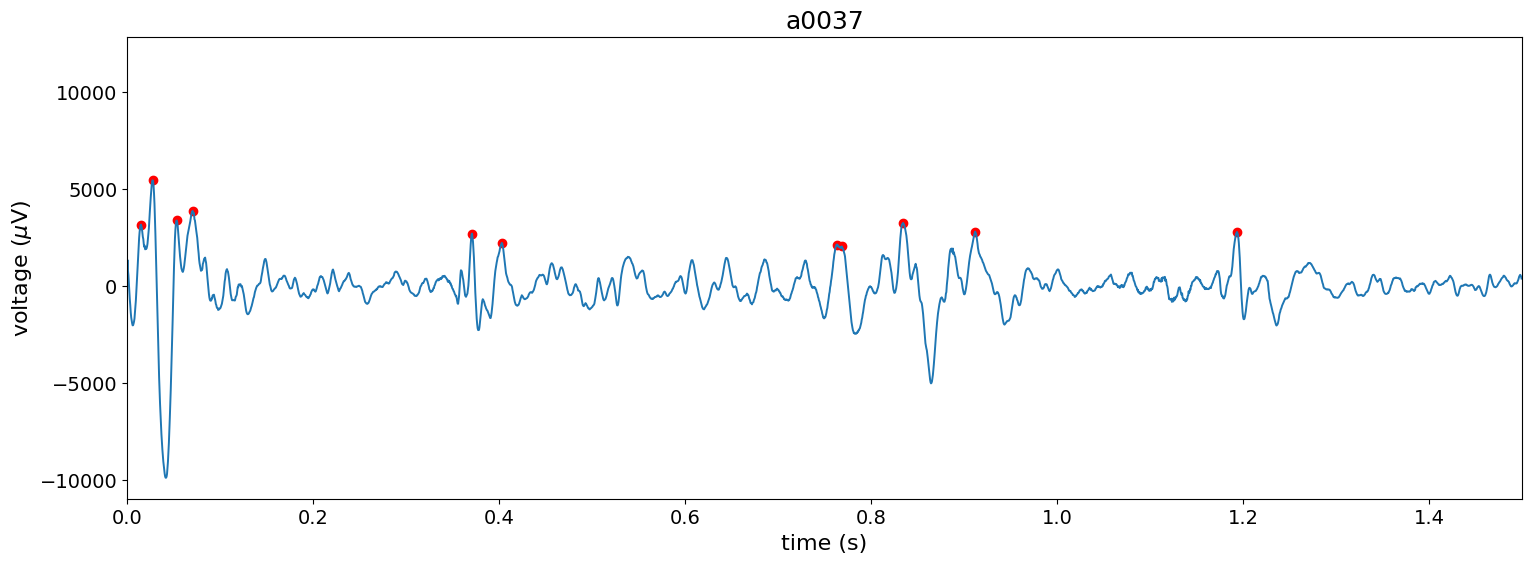

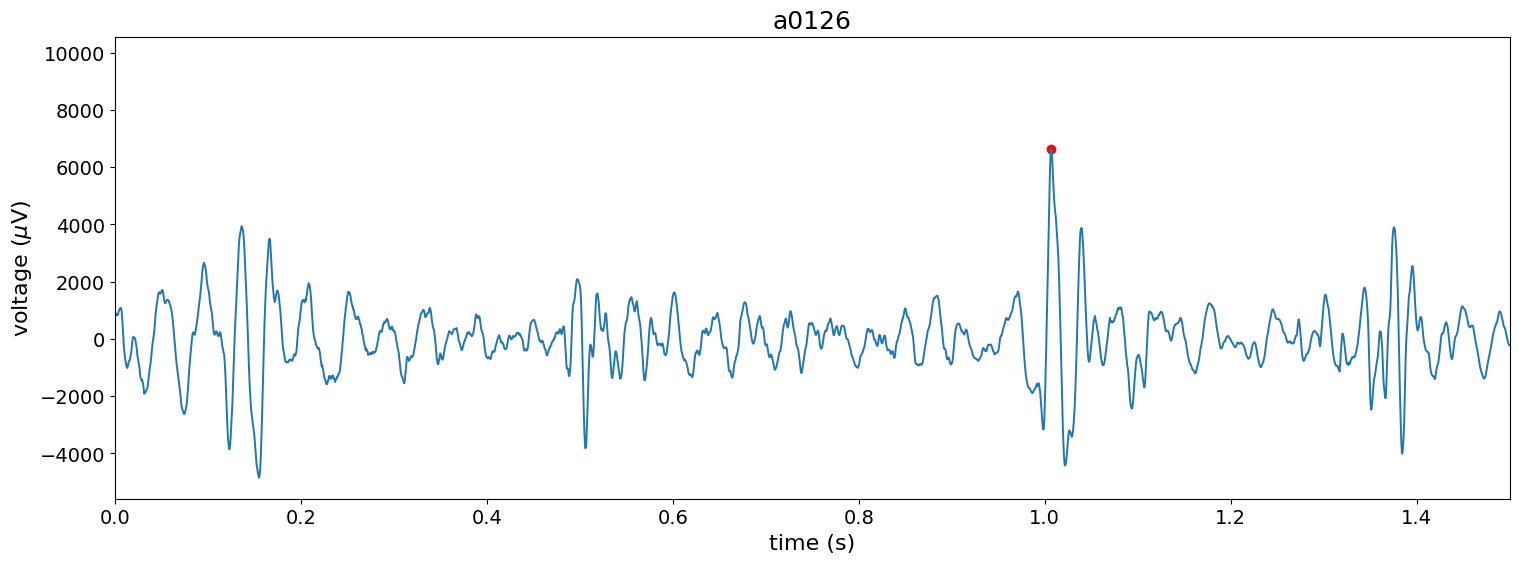

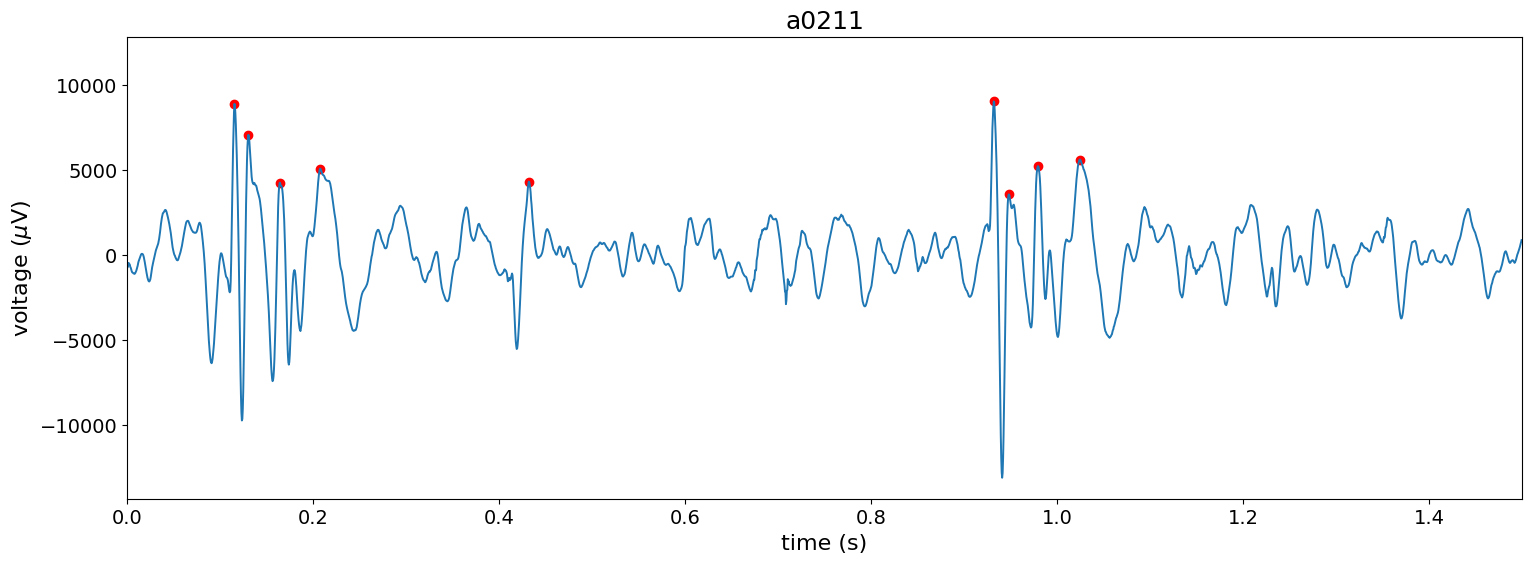

<ipython-input-2-acb81104c65c>:26: RuntimeWarning: overflow encountered in short_scalars
  interval = max(waveData) - min(waveData)


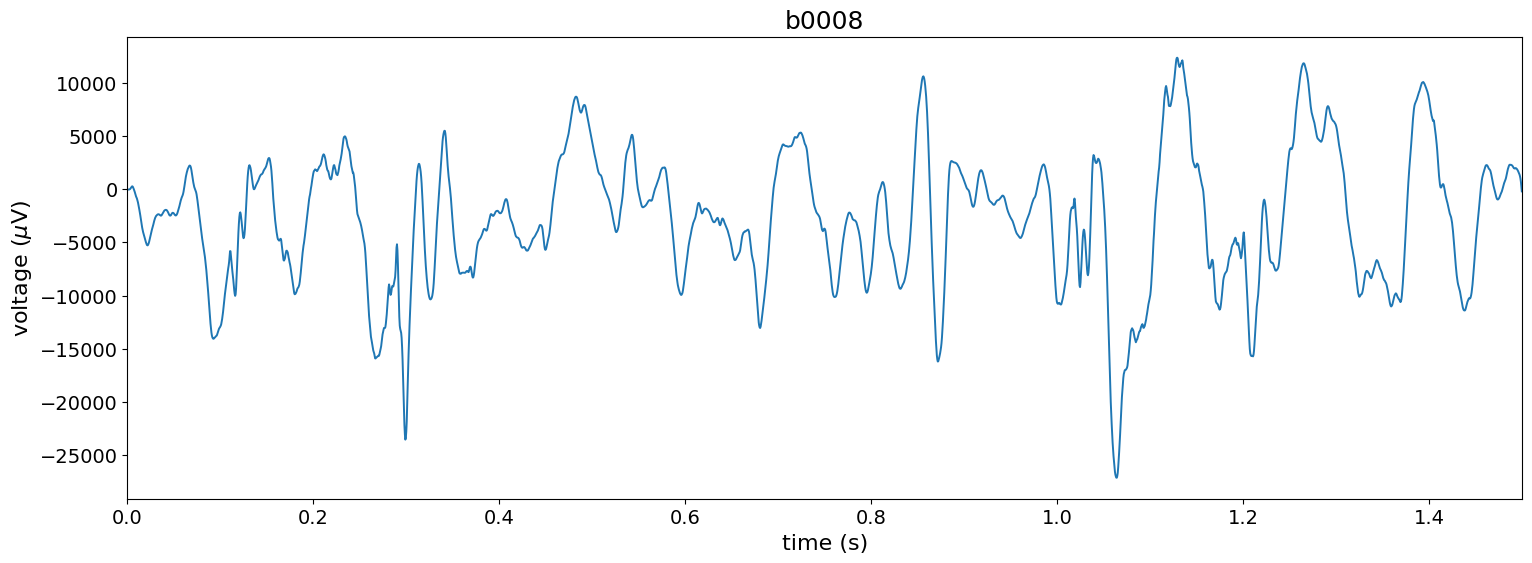

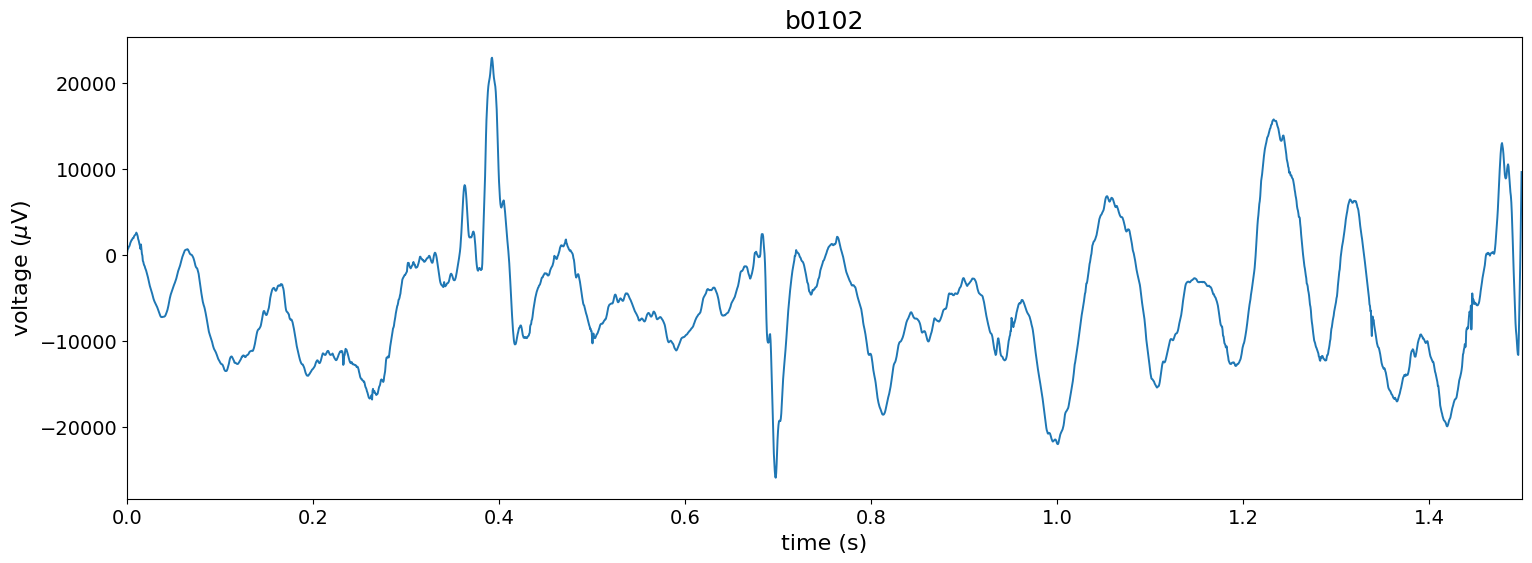

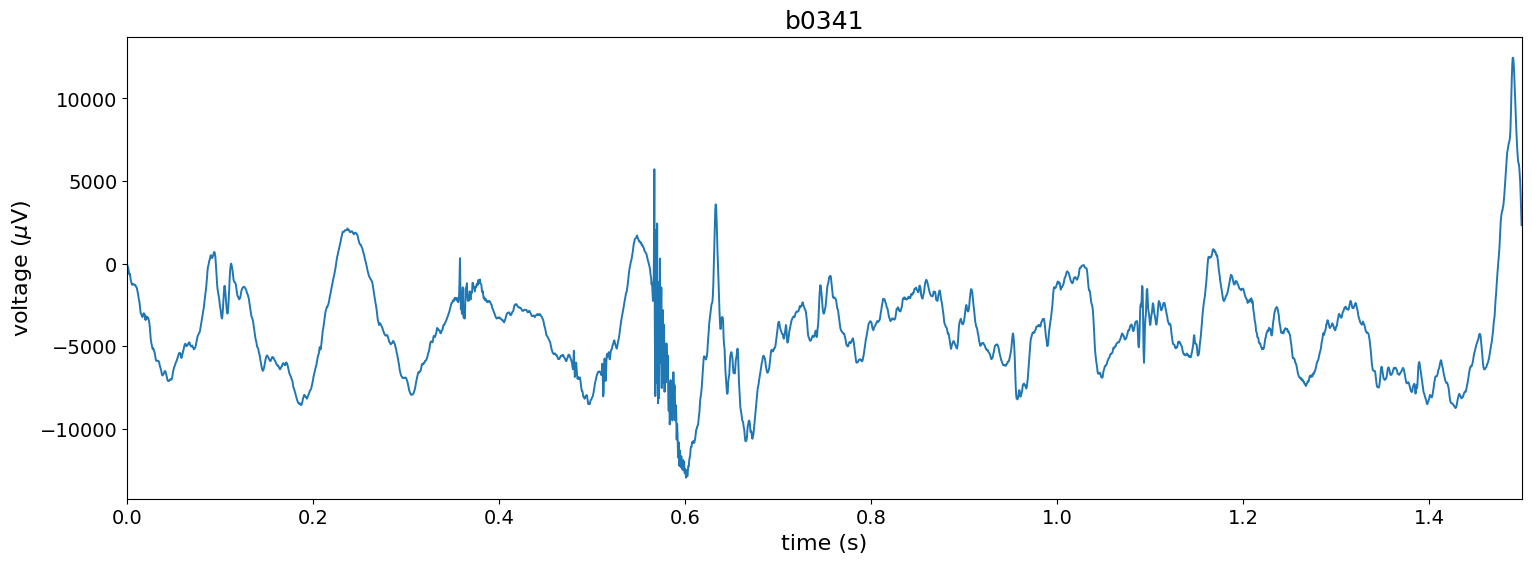

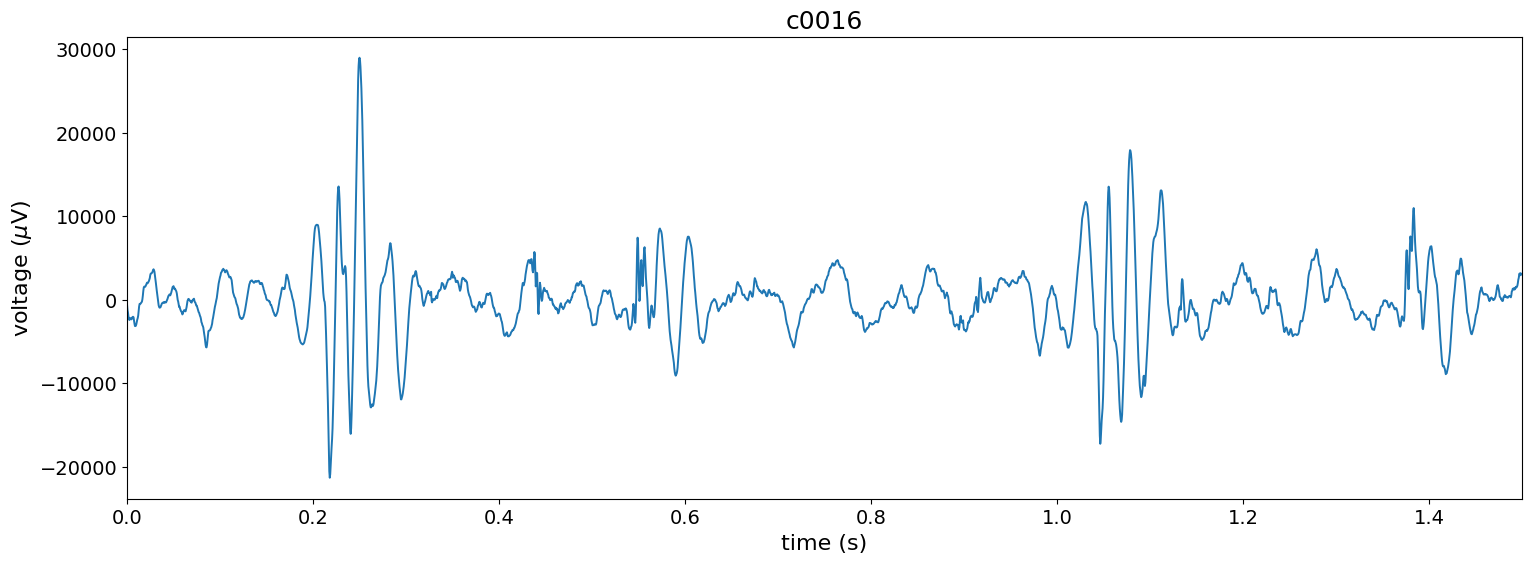

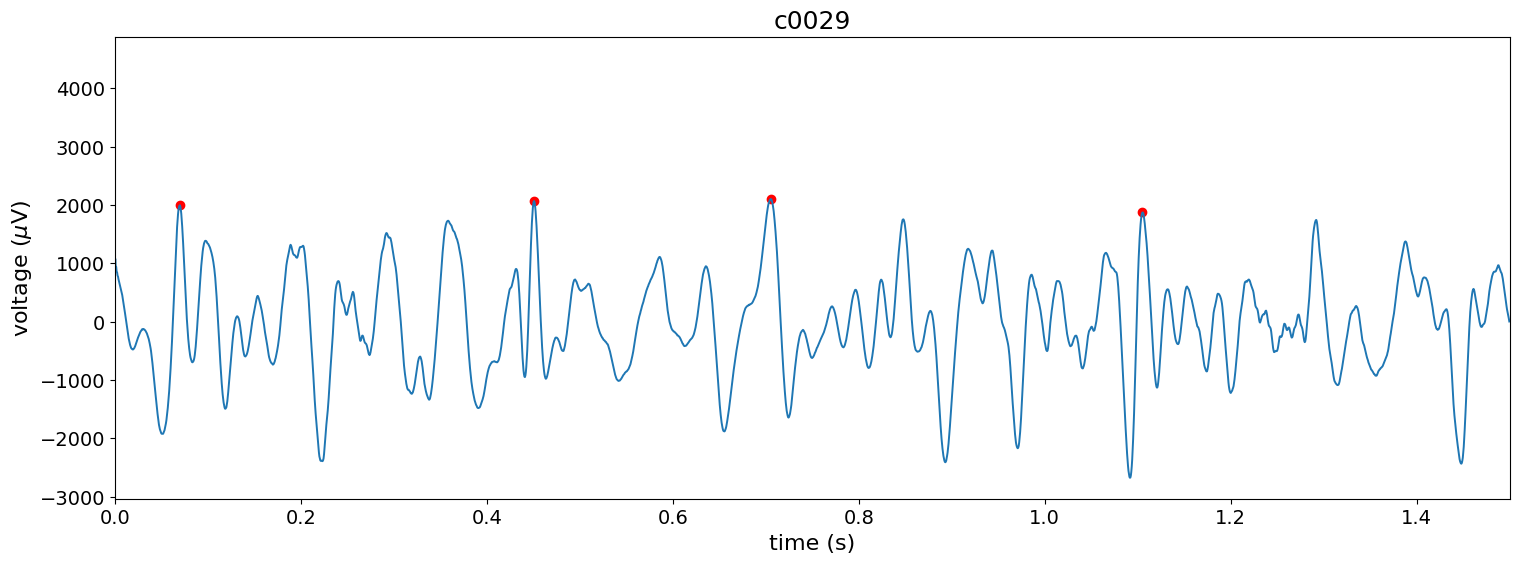

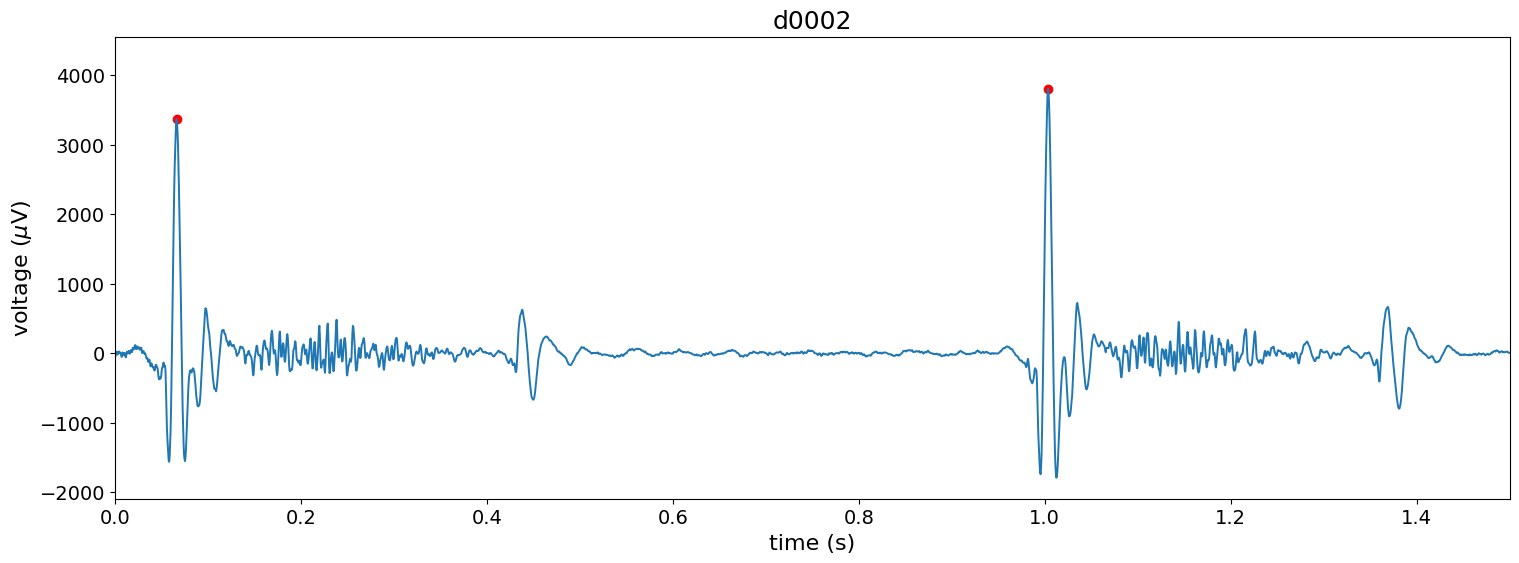

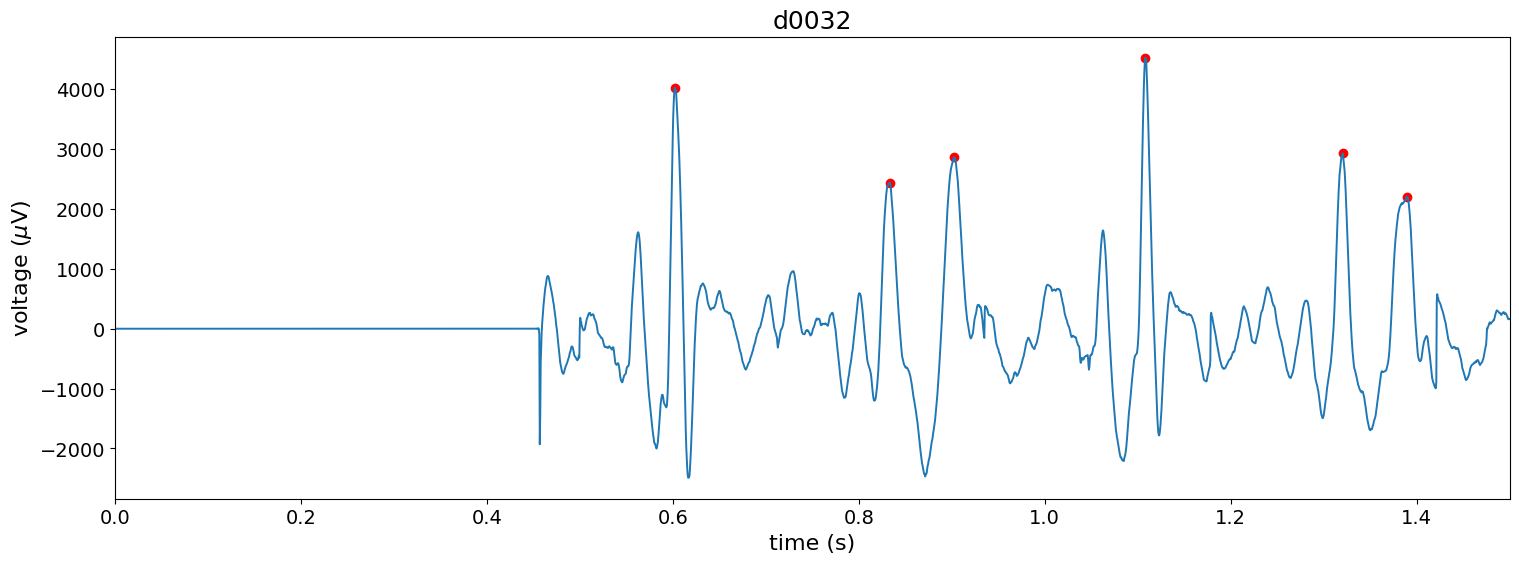

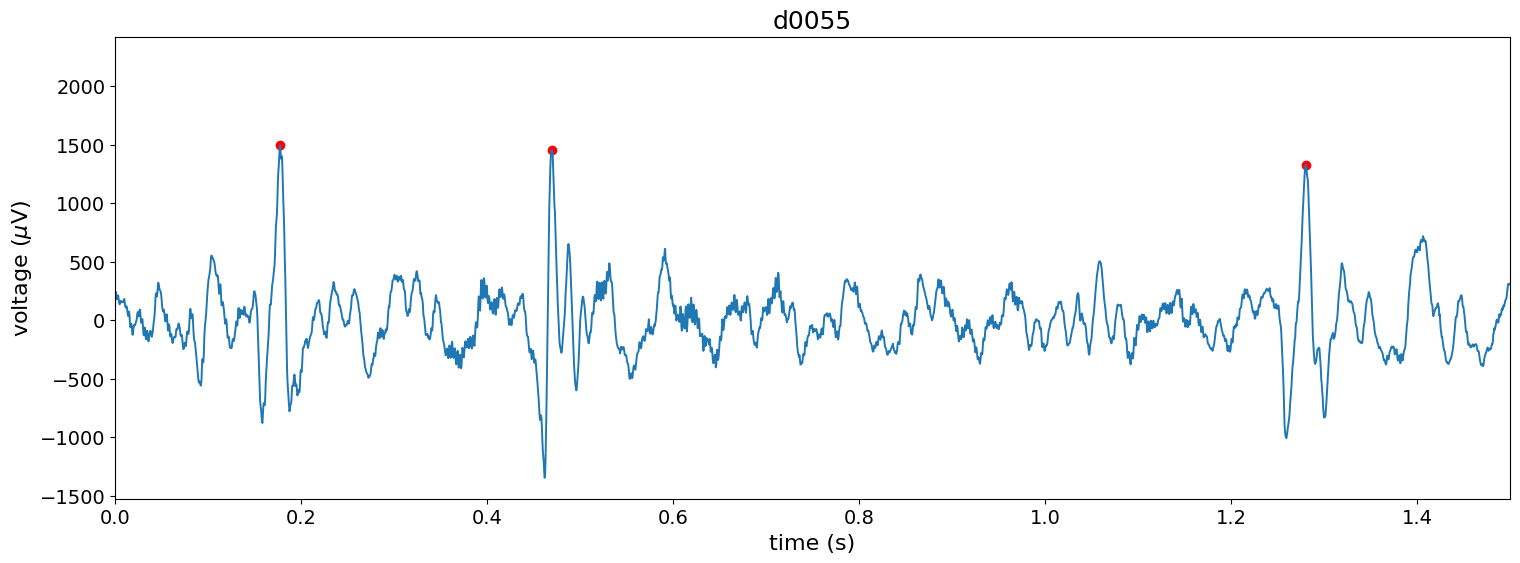

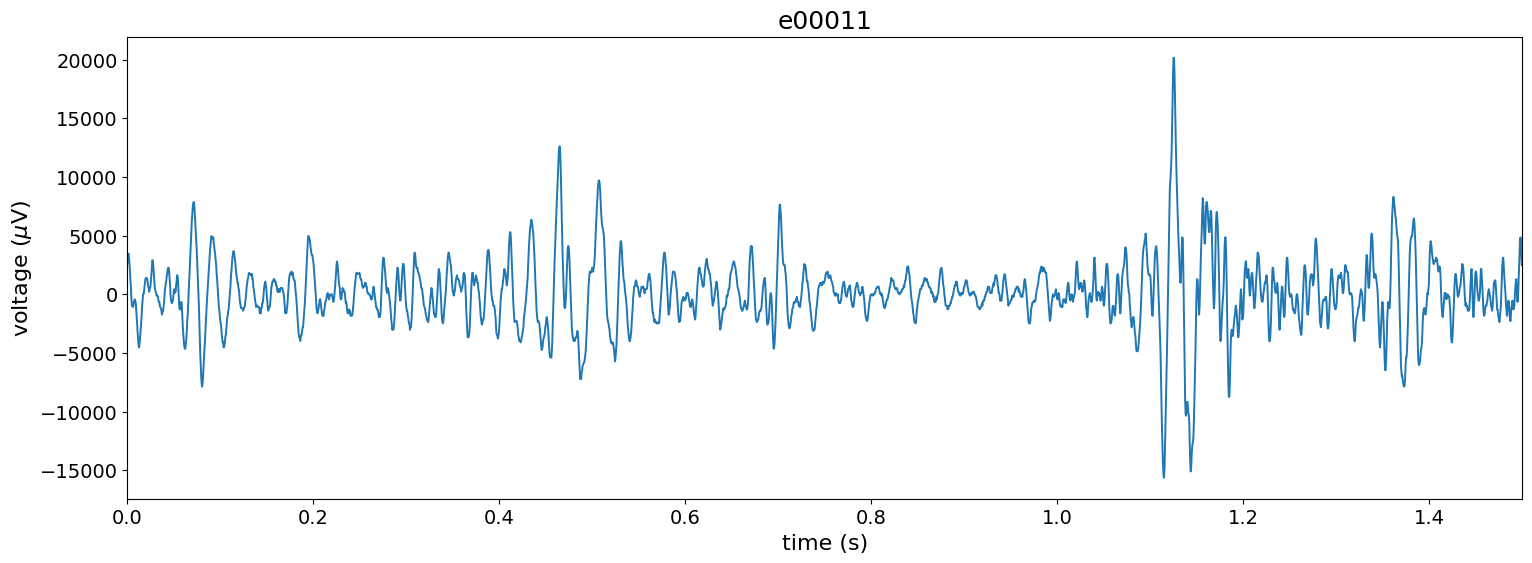

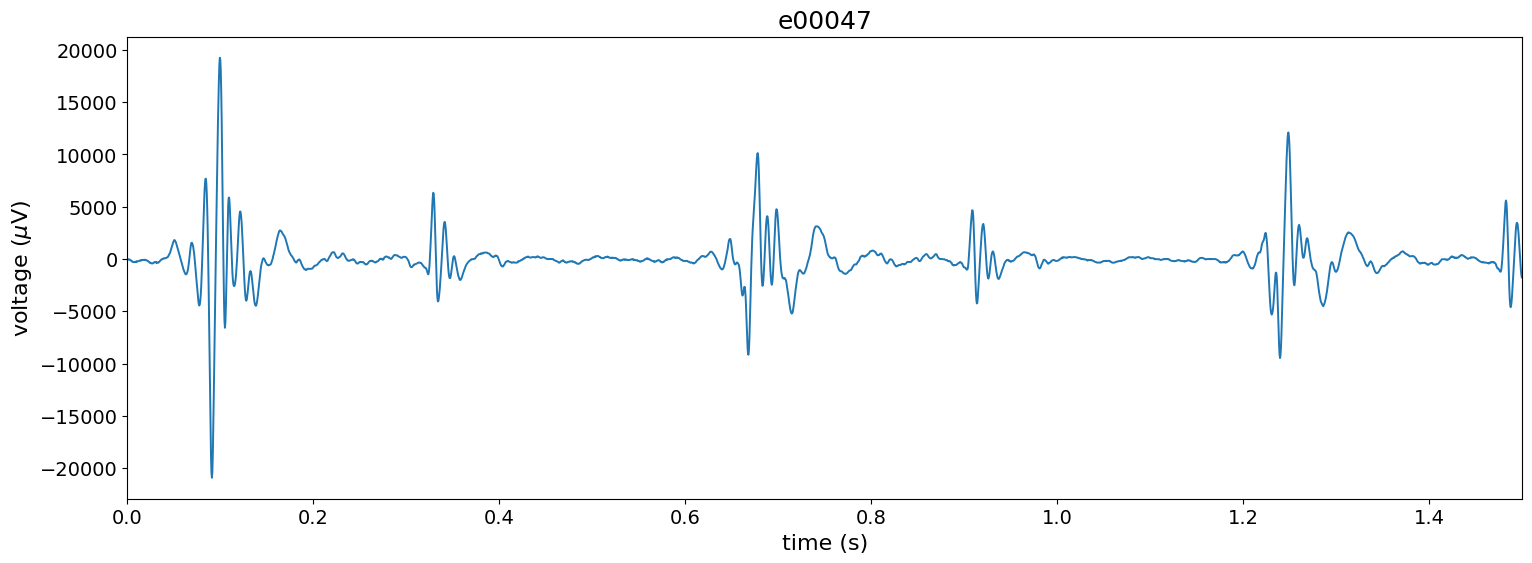

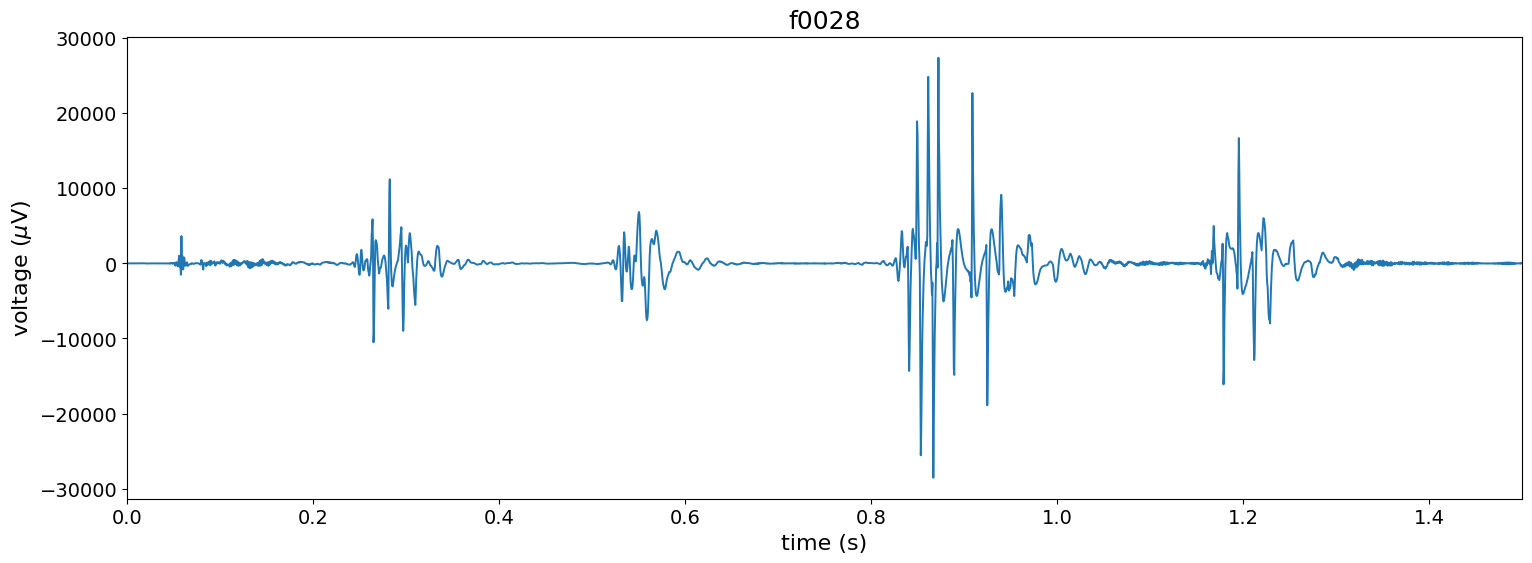

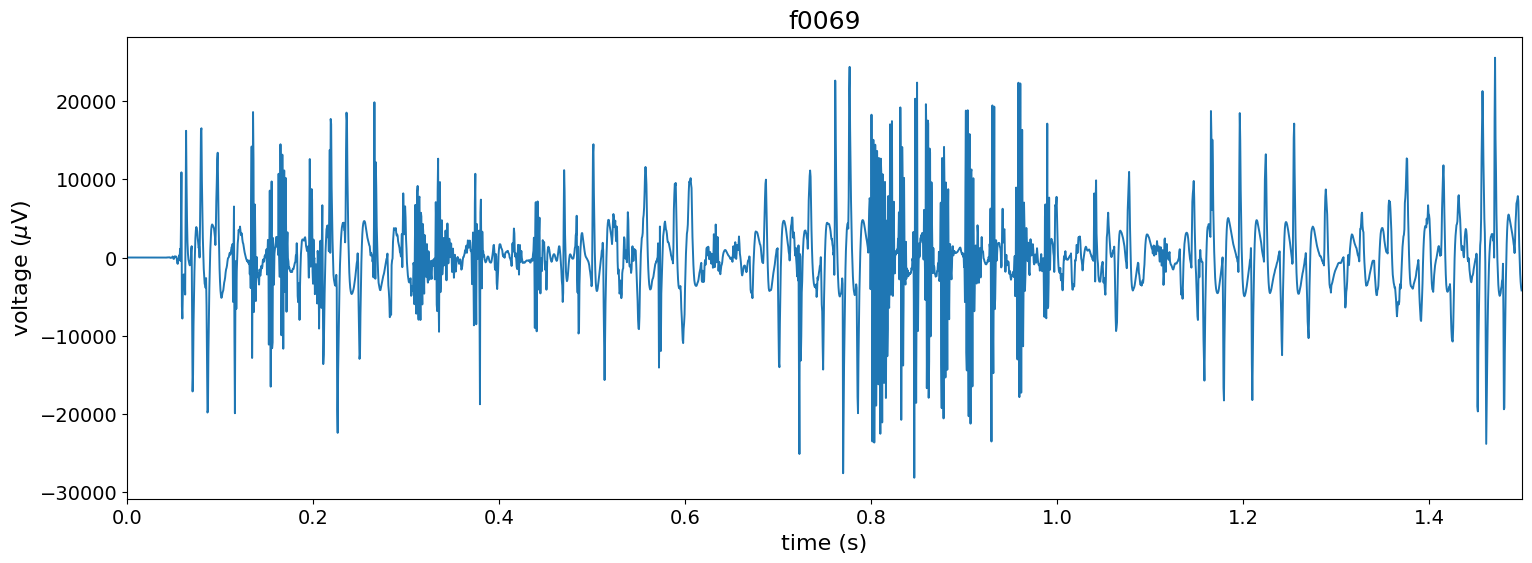

In [ ]:
for i in range(0, len(nice)):
    init_sec = 0
    end_sec = 3
    timeECG, waveData = ecg(nice[i]+'.wav')
    mxs_indices = detecta_maximos_locales(timeECG, waveData)
       #Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.xlim(timeECG[init_sec*1000],timeECG[end_sec*1000])
    plt.plot(timeECG[init_sec*1000:end_sec*1000], waveData[init_sec*1000:end_sec*1000])
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    plt.title(nice[i])
    plt.show()

Beats per minute: 60.56187966130209


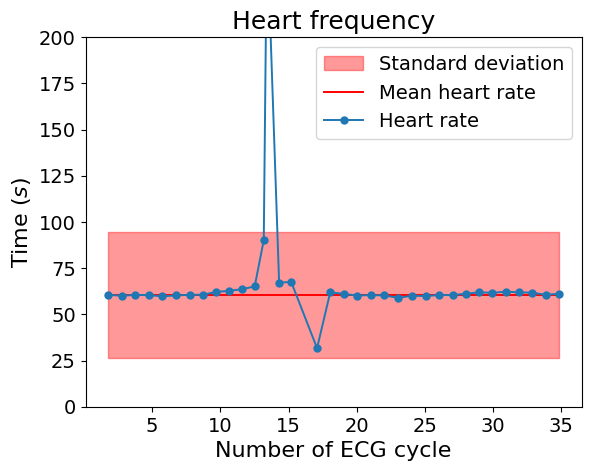

Beats per minute: 60.84912183653713


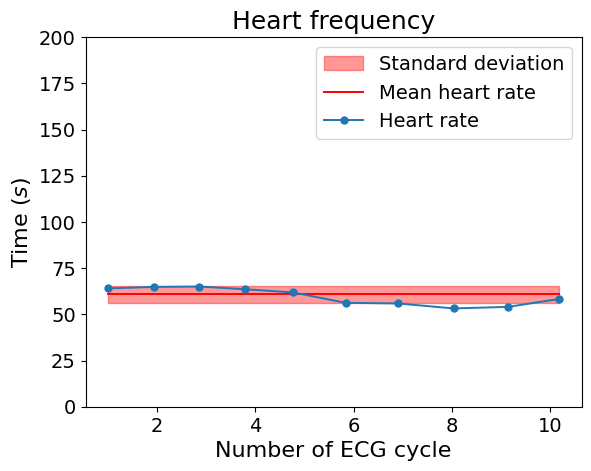

Beats per minute: 81.98444397729662


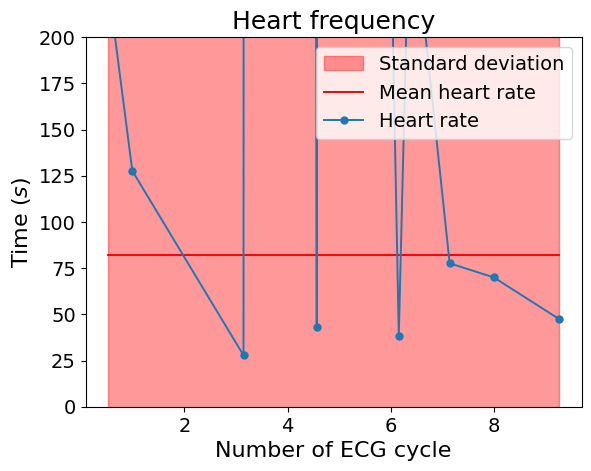

Beats per minute: 191.1335280063711


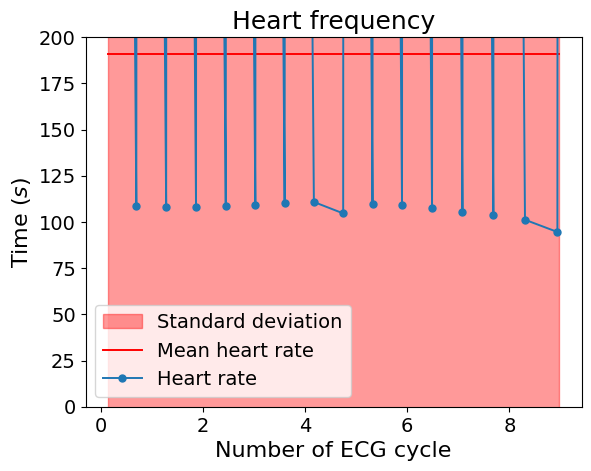

Beats per minute: 164.44319052033373


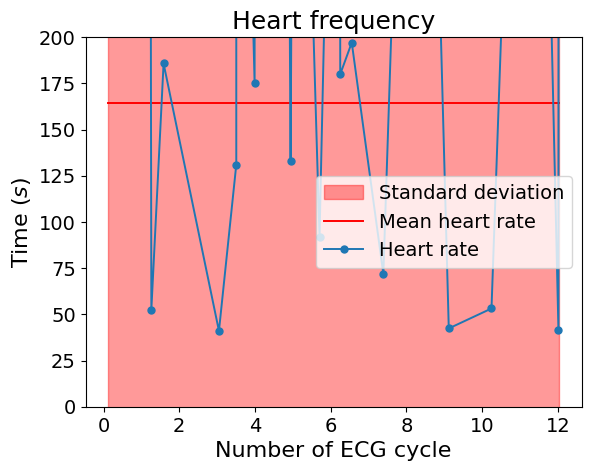

Beats per minute: 88.42652795838751


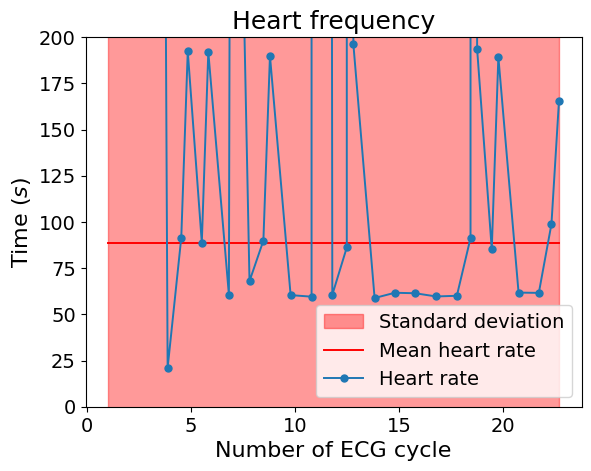

Beats per minute: 179.22606924643586


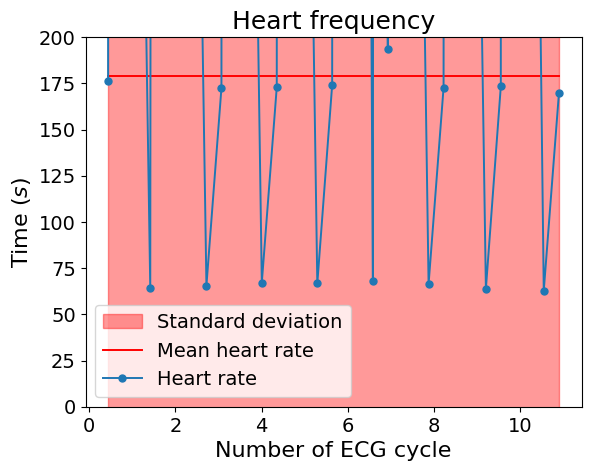

Beats per minute: 58.39889690972503


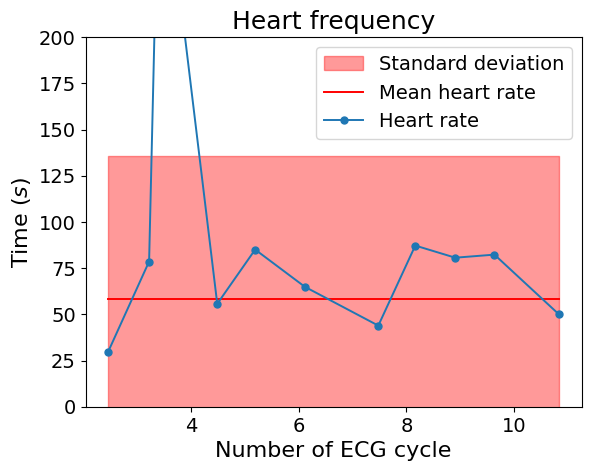

Beats per minute: 43.27963452753066


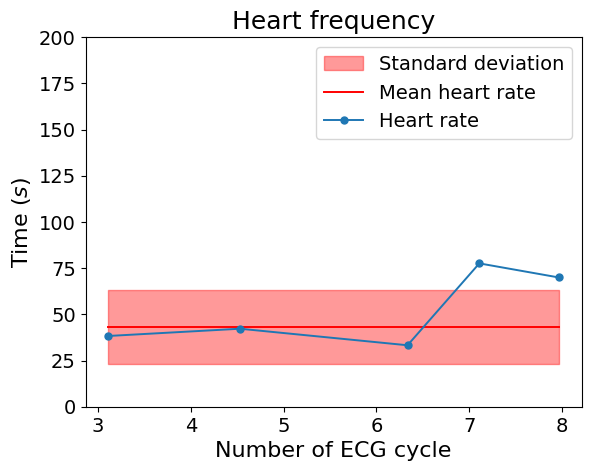

Beats per minute: 49.75124378109453


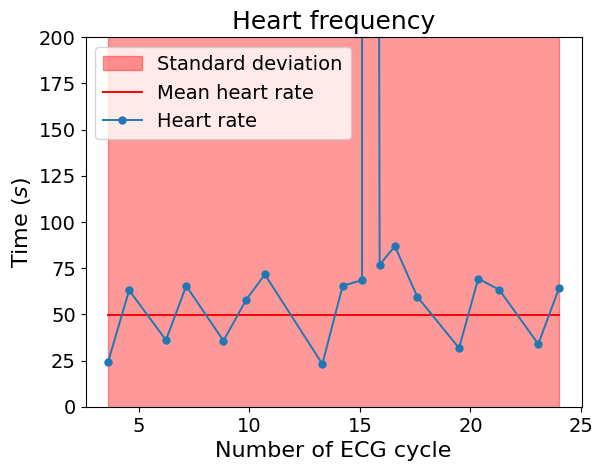

Beats per minute: 79.60199004975124


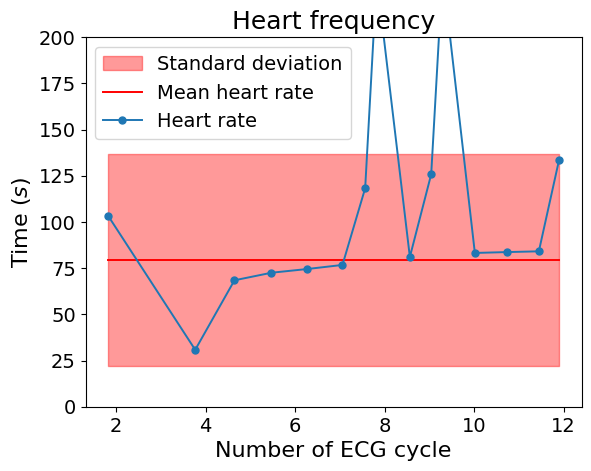

Beats per minute: 117.3522400831245


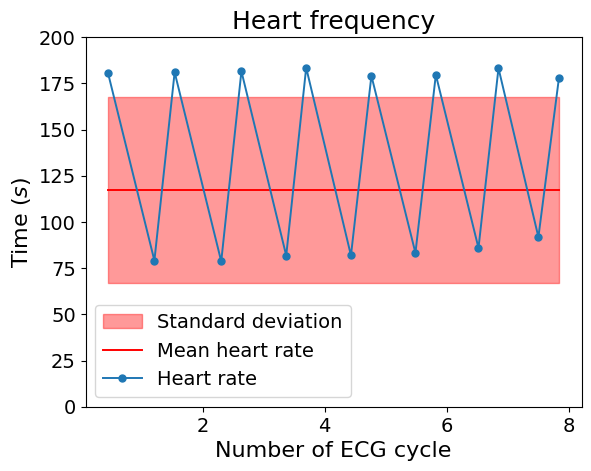

Beats per minute: 147.44801512287333


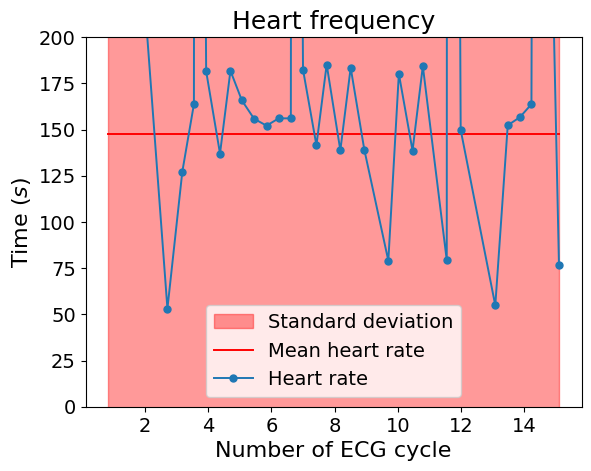

Beats per minute: 70.51991150442477


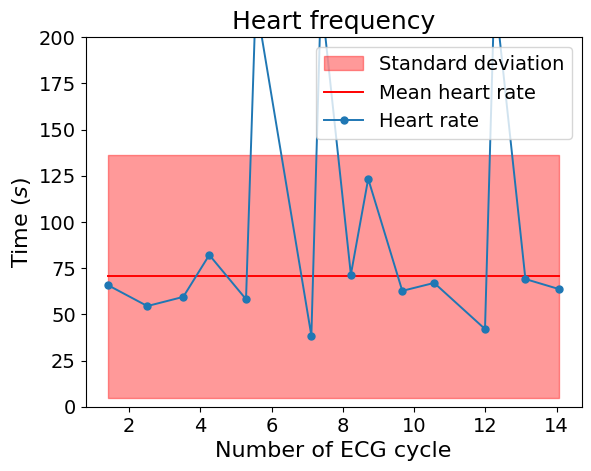

Beats per minute: 70.67137809187278


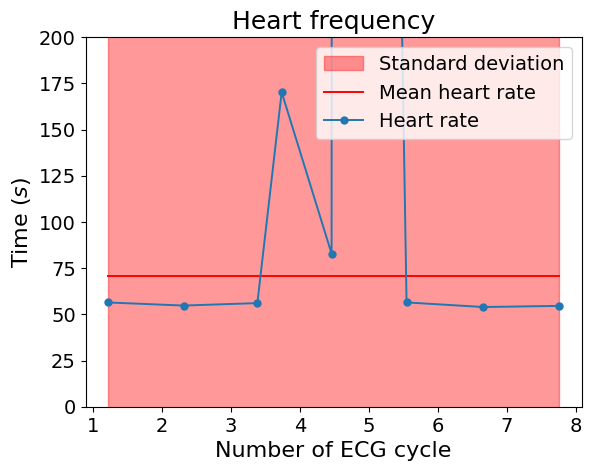

Beats per minute: 107.53330545432821


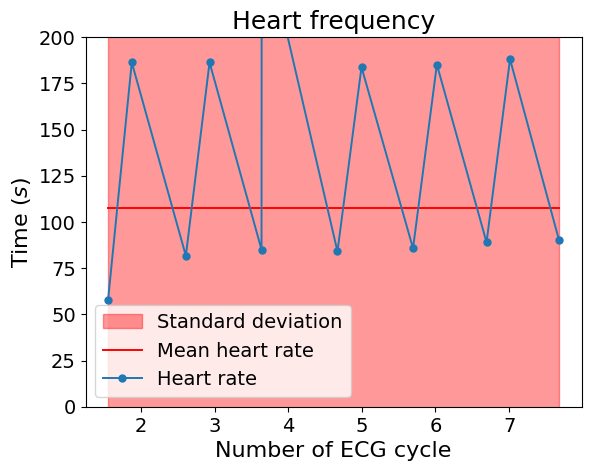

Beats per minute: 116.3575042158516


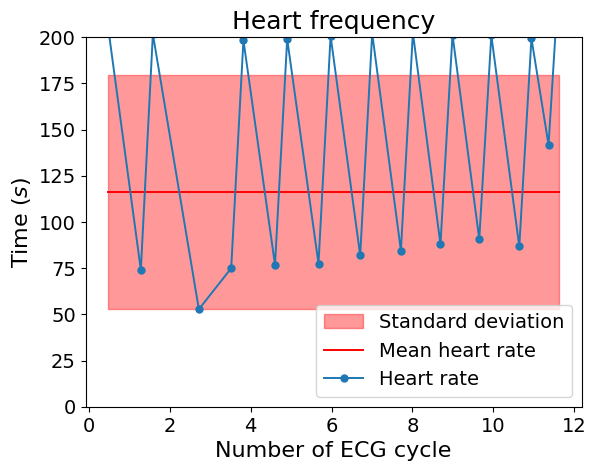

In [ ]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    mxs_indices = detecta_maximos_locales(timeECG, waveData)
    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    print("Beats per minute:", mean_bpm)

    heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
    time = timeECG[mxs_indices]

    mean_vec = [mean_bpm for i in range(0, len(time)-1)]
    std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
    std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]
    plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
    plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
    plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
    plt.ylim((0, 200))
    plt.title("Heart frequency")
    plt.xlabel(r'Number of ECG cycle')
    plt.ylabel(r'Time ($s$)')
    plt.legend()
    plt.show()
